In [7]:
# TODO: short markdown readme on what this notebook does

In [8]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import seaborn as sns

DEFAULT_METRICS = ['time', 'adjusted_rand_score', 'adjusted_mutual_info_score']
DEFAULT_METRICS = [
    'time',
    'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'v_measure_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 
    'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score',
]

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

/var/folders/6s/9yzdsc4d607_h7bjhlvxylkw0000gn/T/ipykernel_8651/999184047.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path    = f'results/{RESULTS_DIR}'
results_dump = f'{full_path}/results_dump.json'

print(f'Reading from results dump: \033[1m{results_dump}')

Reading from results dump: results/res_2024_04_09_T11_16_16/results_dump.json


In [10]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

# extract the dataframe, reorder columns, display sample
results_df = json_to_df(results_dump)
results_df = results_df[[
  'log_time', 'experiment', 'variant', 'n_points', 'noise',
  'time', 'timed_out',
  'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'v_measure_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 
  'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score',
]]
results_df

log_time                experiment  variant  \
0      2024-04-08 21:01:57.284231                   DEFAULT  DEFAULT   
1      2024-04-08 21:01:57.301920                   DEFAULT  DEFAULT   
2      2024-04-08 21:01:57.318775                   DEFAULT  DEFAULT   
3      2024-04-08 21:01:57.334392                   DEFAULT  DEFAULT   
4      2024-04-08 21:01:57.350130                   DEFAULT  DEFAULT   
...                           ...                       ...      ...   
18341  2024-04-09 14:05:34.067476  Refinement k Impact MKNN      300   
18342  2024-04-09 14:05:34.962720  Refinement k Impact MKNN      300   
18343  2024-04-09 14:05:35.813438  Refinement k Impact MKNN      300   
18344  2024-04-09 14:05:36.678542  Refinement k Impact MKNN      300   
18345  2024-04-09 14:05:37.528215  Refinement k Impact MKNN      300   

       n_points  noise      time timed_out  adjusted_mutual_info_score  \
0           100    0.0  0.010119     False                    0.857516   
1           100    0.0  0.008369     False                    0.928602   
2           100    0.0  0.008701     False                    0.763108   
3           100    0.0  0.007630     False                    1.000000   
4           100    0.0  0.007718     False                    1.000000   
...         ...    ...       ...       ...                         ...   
18341      1000    0.2  0.726918     False                    0.399953   
18342      1000    0.2  0.861819     False                    0.391206   
18343      1000    0.2  0.812724     False                    0.442175   
18344      1000    0.2  0.842941     False                    0.426167   
18345      1000    0.2  0.819440     False                    0.382649   

       adjusted_rand_score  completeness_score  homogeneity_score  \
0                 0.920800            0.858559           0.858559   
1                 0.959996            0.929259           0.928991   
2                 0.844835            0.765286           0.764403   
3                 1.000000            1.000000           1.000000   
4                 1.000000            1.000000           1.000000   
...                    ...                 ...                ...   
18341             0.500764            0.400407           0.400365   
18342             0.483903            0.392749           0.390552   
18343             0.547147            0.442581           0.442576   
18344             0.529513            0.426621           0.426542   
18345             0.481117            0.383161           0.383028   

       v_measure_score  normalized_mutual_info_score  fowlkes_mallows_score  \
0             0.858559                      0.858559               0.960000   
1             0.929125                      0.929125               0.979800   
2             0.764844                      0.764844               0.921697   
3             1.000000                      1.000000               1.000000   
4             1.000000                      1.000000               1.000000   
...                ...                           ...                    ...   
18341         0.400386                      0.400386               0.750150   
18342         0.391647                      0.391647               0.742695   
18343         0.442578                      0.442578               0.773349   
18344         0.426581                      0.426581               0.764551   
18345         0.383095                      0.383095               0.740362   

       silhouette_score  calinski_harabasz_score  davies_bouldin_score  
0              0.330102                67.985476              1.120876  
1              0.333458                70.237779              1.102076  
2              0.356151                76.875819              1.051469  
3              0.310239                61.837324              1.183553  
4              0.306017                59.807709              1.204404  
...                 ...                      ...       

In [11]:
# extract all the experiments and variants present in the dump
experiment_variants = results_df.groupby('experiment')['variant'].apply(set)
print('The following experiments and variants were found in results dump:')
padding = max([len(x) for x in experiment_variants.index])

for (experiment, variants) in experiment_variants.items():
    variants = [str(x) for x in variants]
    print(f'\033[1m{experiment:<{padding}}\033[0m: {", ".join(variants)}')

The following experiments and variants were found in results dump:
Affinity                : manhattan, euclidean
DEFAULT                 : DEFAULT
Decomposition           : sparse_eigh, sparse, dense, dense_eigh
Laplacian               : standard, normalised
Refinement              : knn, mutual_knn, none, eps
Refinement EPS Impact   : 0.0, 0.13793103448275862, 0.1724137931034483, 0.24137931034482757, 0.27586206896551724, 0.3103448275862069, 0.41379310344827586, 0.48275862068965514, 0.5172413793103449, 0.6206896551724138, 0.8275862068965517, 1.0, 0.6551724137931034, 0.10344827586206896, 0.896551724137931, 0.7241379310344828, 0.5517241379310345, 0.9655172413793103, 0.3793103448275862, 0.06896551724137931, 0.20689655172413793, 0.7931034482758621, 0.4482758620689655, 0.8620689655172413, 0.034482758620689655, 0.6896551724137931, 0.9310344827586207, 0.3448275862068966, 0.7586206896551724, 0.5862068965517241
Refinement k Impact KNN : 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 4

In [41]:
# show summary tables of results for each experiment
experiment_variants = results_df.groupby('experiment')['variant'].apply(set)
for (experiment, variants) in experiment_variants.items():
    
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    experiment_results = experiment_results[['variant', 'noise', 'time', 'n_points', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'v_measure_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score',]]
    experiment_results.columns = ['Variant', 'Noise', 'Time', 'n points', 'AMI', 'ARI', 'Comp_scr', 'Homo_scr', 'V_scr', 'NMI', 'FMI', 'Sil_scr', 'CHI', 'DBI',]
    summarised = experiment_results.groupby(['Variant', 'Noise', 'n points']).agg(['mean', 'std'])
    
    print(experiment)
    display(summarised)

Affinity


Time                 AMI                 ARI  \
                              mean       std      mean       std      mean   
Variant   Noise n points                                                     
euclidean 0.0   100       0.008690  0.000872  0.805531  0.197420  0.841672   
                200       0.022875  0.000871  0.906858  0.059579  0.944803   
                300       0.059772  0.031956  0.842291  0.100013  0.897580   
                400       0.102245  0.054044  0.918511  0.054660  0.956581   
                500       0.139463  0.061845  0.866159  0.062884  0.923460   
...                            ...       ...       ...       ...       ...   
manhattan 0.2   2600      4.462749  0.043408  0.966777  0.009782  0.985896   
                2700      5.005560  0.120135  0.974756  0.013366  0.989365   
                2800      5.598583  0.068016  0.963583  0.012545  0.984350   
                2900      6.230934  0.096890  0.967183  0.007799  0.986253   
                3000      7.732461  0.148032  0.968754  0.016815  0.986720   

                                    Comp_scr            Homo_scr            \
                               std      mean       std      mean       std   
Variant   Noise n points                                                     
euclidean 0.0   100       0.201885  0.809755  0.190786  0.804317  0.200812   
                200       0.037715  0.907409  0.059182  0.906984  0.059544   
                300       0.086994  0.843358  0.098590  0.841994  0.100946   
                400       0.031513  0.918693  0.054529  0.918624  0.054593   
                500       0.046426  0.866442  0.062614  0.866263  0.062970   
...                            ...       ...       ...       ...       ...   
manhattan 0.2   2600      0.004882  0.966789  0.009776  0.966782  0.009783   
                2700      0.005847  0.974766  0.013362  0.974759  0.013363   
                2800      0.006179  0.963594  0.012541  0.963590  0.012541   
                2900      0.003754  0.967193  0.007797  0.967190  0.007798   
                3000      0.008005  0.968763  0.016810  0.968759  0.016813   

                          ...       NMI                 FMI            \
                          ...      mean       std      mean       std   
Variant   Noise n points  ...                                           
euclidean 0.0   100       ...  0.806977  0.195928  0.921849  0.098039   
                200       ...  0.907196  0.059363  0.972278  0.018934   
                300       ...  0.842673  0.099770  0.948778  0.043337   
                400       ...  0.918659  0.054561  0.978238  0.015794   
                500       ...  0.866352  0.062792  0.961665  0.023234   
...                       ...       ...       ...       ...       ...   
manhattan 0.2   2600      ...  0.966786  0.009780  0.992945  0.002442   
                2700      ...  0.974763  0.013363  0.994680  0.002924   
                2800      ...  0.963592  0.012541  0.992172  0.003091   
                2900      ...  0.967192  0.007797  0.993124  0.001878   
                3000      ...  0.968761  0.016811  0.993358  0.004004   

                           Sil_scr                    CHI             \
                              mean       std         mean        std   
Variant   Noise n points                                               
euclidean 0.0   100       0.355005  0.050245    76.846512  19.327701   
                200       0.335037  0.011372   135.684109   6.493894   
                300       0.352407  0.029373   222.734038  33.848297   
                400       0.338025  0.010074   274.612729  13.297901   
                500       0.347091  0.017479   357.844513  32.980898   
...                            ...       ...          ...        ...   
manhattan 0.2   2600      0.332344  0.002869  1726.136215  23.834888   
                2700      0.331788  0.003565  1785.743534  35.171888   
                2800      0.3

DEFAULT


Time                 AMI                 ARI  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
DEFAULT 0.0   100       0.008507  0.001006  0.909845  0.101091  0.945126   
              200       0.020735  0.000248  0.756098  0.092564  0.819186   
              300       0.042303  0.002242  0.863477  0.095660  0.914568   
              400       0.060443  0.000404  0.906536  0.035682  0.950591   
              500       0.104094  0.028429  0.824601  0.121425  0.885797   
...                          ...       ...       ...       ...       ...   
        0.2   2600      4.909703  0.203289  0.924830  0.015442  0.963119   
              2700      5.293922  0.083363  0.914234  0.012574  0.957205   
              2800      5.834937  0.035776  0.915960  0.012060  0.958157   
              2900      6.440362  0.052516  0.917304  0.017424  0.958788   
              3000      8.159720  0.128552  0.917498  0.017680  0.958842   

                                  Comp_scr            Homo_scr            ...  \
                             std      mean       std      mean       std  ...   
Variant Noise n points                                                    ...   
DEFAULT 0.0   100       0.064987  0.910621  0.100196  0.910391  0.100504  ...   
              200       0.106067  0.759168  0.089204  0.754855  0.095199  ...   
              300       0.064717  0.864073  0.095189  0.863541  0.095669  ...   
              400       0.020770  0.906743  0.035612  0.906668  0.035622  ...   
              500       0.100168  0.825246  0.120743  0.824465  0.121752  ...   
...                          ...       ...       ...       ...       ...  ...   
        0.2   2600      0.009095  0.924863  0.015430  0.924839  0.015446  ...   
              2700      0.007555  0.914261  0.012571  0.914253  0.012569  ...   
              2800      0.007248  0.915989  0.012053  0.915974  0.012060  ...   
              2900      0.010691  0.917335  0.017409  0.917315  0.017431  ...   
              3000      0.010403  0.917526  0.017683  0.917508  0.017669  ...   

                             NMI                 FMI             Sil_scr  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
DEFAULT 0.0   100       0.910506  0.100350  0.972299  0.032798  0.327194   
              200       0.756988  0.092221  0.909869  0.052028  0.374222   
              300       0.863807  0.095429  0.957174  0.032421  0.346504   
              400       0.906705  0.035617  0.975235  0.010410  0.338121   
              500       0.824855  0.121249  0.942877  0.050005  0.358696   
...                          ...       ...       ...       ...       ...   
        0.2   2600      0.924851  0.015438  0.981553  0.004549  0.340153   
              2700      0.914257  0.012570  0.978595  0.003779  0.341789   
              2800      0.915982  0.012056  0.979071  0.003625  0.341799   
              2900      0.917325  0.017420  0.979387  0.005347  0.340935   
              3000      0.917517  0.017676  0.979414  0.005203  0.340934   

                                          CHI                  DBI            
                             std         mean        std      mean       std  
Variant Noise n points                                                        
DEFAULT 0.0   100       0.020138    67.348821   6.833009  1.132476  0.062055  
              200       0.033104   166.137106  26.346977  1.011433  0.090246  
              300       0.021815   215.909279  22.159123  1.094287  0.062591  
              400       0.005770   275.179657   8.608541  1.122127  0.021130  
              500       0.030115   380.881184  56.070472  1.065936  0.076722  
...                          ...          ...        ...       ...       ...  
        0.2   2600      0.002481  1789.921317  18.49

Decomposition


Time                 AMI                 ARI  \
                                mean       std      mean       std      mean   
Variant     Noise n points                                                     
dense       0.0   100       0.010141  0.000751  0.604908  0.165479  0.653876   
                  200       0.022404  0.001560  0.791268  0.170404  0.853727   
                  300       0.092646  0.065668  0.890373  0.055443  0.939647   
                  400       0.100996  0.050122  0.888102  0.032892  0.936942   
                  500       0.156115  0.057561  0.911245  0.073307  0.946767   
...                              ...       ...       ...       ...       ...   
sparse_eigh 0.2   2600      0.488717  0.066829  0.918016  0.015982  0.958895   
                  2700      0.579410  0.036634  0.909975  0.012964  0.954597   
                  2800      0.710759  0.046009  0.941965  0.014885  0.972764   
                  2900      0.837778  0.133304  0.916834  0.020219  0.958526   
                  3000      0.780912  0.087260  0.920624  0.011653  0.960657   

                                      Comp_scr            Homo_scr            \
                                 std      mean       std      mean       std   
Variant     Noise n points                                                     
dense       0.0   100       0.193031  0.614542  0.158903  0.601470  0.169409   
                  200       0.134119  0.792458  0.169485  0.791598  0.170084   
                  300       0.033915  0.890674  0.055287  0.890602  0.055331   
                  400       0.019028  0.888421  0.032856  0.888189  0.032810   
                  500       0.049929  0.911615  0.072891  0.911133  0.073509   
...                              ...       ...       ...       ...       ...   
sparse_eigh 0.2   2600      0.009247  0.918057  0.015974  0.918019  0.015980   
                  2700      0.007678  0.910005  0.012961  0.909994  0.012961   
                  2800      0.008406  0.941989  0.014874  0.941970  0.014887   
                  2900      0.012239  0.916861  0.020210  0.916848  0.020218   
                  3000      0.006622  0.920657  0.011657  0.920630  0.011644   

                            ...       NMI                 FMI            \
                            ...      mean       std      mean       std   
Variant     Noise n points  ...                                           
dense       0.0   100       ...  0.607853  0.164223  0.829563  0.093523   
                  200       ...  0.792027  0.169784  0.926597  0.067289   
                  300       ...  0.890638  0.055309  0.969725  0.017012   
                  400       ...  0.888305  0.032833  0.968398  0.009536   
                  500       ...  0.911374  0.073200  0.973352  0.024978   
...                         ...       ...       ...       ...       ...   
sparse_eigh 0.2   2600      ...  0.918038  0.015977  0.979440  0.004625   
                  2700      ...  0.909999  0.012961  0.977290  0.003840   
                  2800      ...  0.941980  0.014881  0.986378  0.004204   
                  2900      ...  0.916855  0.020214  0.979256  0.006121   
                  3000      ...  0.920644  0.011650  0.980323  0.003312   

                             Sil_scr                    CHI             \
                                mean       std         mean        std   
Variant     Noise n points                                               
dense       0.0   100       0.405001  0.056868    97.825401  23.462273   
                  200       0.362365  0.042093   158.334702  33.619751   
                  300       0.341801  0.009751   211.644740   9.060267   
                  400       0.341879  0.007299   280.236292   9.654184   
                  500       0.341503  0.017526   348.300700  29.060541   
...                              ...       ...          ...        ...   
sparse_eigh 0.2   2600      0.340784  0.002795  1794.870444  22.636858   

Laplacian


Time                 AMI                 ARI  \
                               mean       std      mean       std      mean   
Variant    Noise n points                                                     
normalised 0.0   100       0.009061  0.000706  0.813842  0.215584  0.837270   
                 200       0.020452  0.001180  0.849037  0.118818  0.893431   
                 300       0.039695  0.001820  0.876739  0.064809  0.926920   
                 400       0.075895  0.042481  0.918021  0.037885  0.954531   
                 500       0.152847  0.062808  0.910074  0.036844  0.952583   
...                             ...       ...       ...       ...       ...   
standard   0.2   2600      4.826514  0.338152  0.903535  0.030076  0.949926   
                 2700      5.223782  0.011878  0.892274  0.012384  0.943338   
                 2800      6.213620  0.632302  0.918035  0.015112  0.959283   
                 2900      6.395720  0.050836  0.914668  0.018988  0.957172   
                 3000      8.098700  0.077201  0.925949  0.014128  0.963805   

                                     Comp_scr            Homo_scr            \
                                std      mean       std      mean       std   
Variant    Noise n points                                                     
normalised 0.0   100       0.226402  0.819418  0.206334  0.811356  0.221073   
                 200       0.108449  0.850730  0.116436  0.848458  0.120301   
                 300       0.044834  0.877219  0.064594  0.876856  0.064711   
                 400       0.023630  0.918294  0.037735  0.918045  0.037899   
                 500       0.022103  0.910246  0.036777  0.910163  0.036805   
...                             ...       ...       ...       ...       ...   
standard   0.2   2600      0.018229  0.903573  0.030074  0.903550  0.030061   
                 2700      0.008241  0.892322  0.012362  0.892285  0.012400   
                 2800      0.008977  0.918064  0.015109  0.918048  0.015107   
                 2900      0.011656  0.914699  0.018976  0.914679  0.018990   
                 3000      0.008936  0.925980  0.014103  0.925953  0.014146   

                           ...       NMI                 FMI            \
                           ...      mean       std      mean       std   
Variant    Noise n points  ...                                           
normalised 0.0   100       ...  0.815237  0.213946  0.920697  0.108386   
                 200       ...  0.849587  0.118383  0.946759  0.053853   
                 300       ...  0.877037  0.064652  0.963352  0.022482   
                 400       ...  0.918170  0.037817  0.977215  0.011838   
                 500       ...  0.910204  0.036791  0.976246  0.011072   
...                        ...       ...       ...       ...       ...   
standard   0.2   2600      ...  0.903561  0.030067  0.974954  0.009118   
                 2700      ...  0.892303  0.012381  0.971659  0.004121   
                 2800      ...  0.918056  0.015108  0.979634  0.004490   
                 2900      ...  0.914689  0.018983  0.978579  0.005830   
                 3000      ...  0.925966  0.014125  0.981897  0.004469   

                            Sil_scr                    CHI             \
                               mean       std         mean        std   
Variant    Noise n points                                               
normalised 0.0   100       0.354412  0.054032    77.989894  20.561040   
                 200       0.349725  0.028701   148.171390  21.815531   
                 300       0.346039  0.014100   214.947655  15.036839   
                 400       0.340099  0.006740   276.858035  10.455624   
                 500       0.338356  0.005508   345.195604   8.238444   
...                             ...       ...          ...        ...   
standard   0.2   2600      0.343143  0.004724  1815.914203  47.410881   
                 2700      0.345554  0.001715  191

Refinement


Time                     AMI            \
                            mean       std          mean       std   
Variant Noise n points                                               
eps     0.0   100       0.009294  0.002656  7.245925e-01  0.313528   
              200       0.035466  0.005718  9.242926e-01  0.069140   
              300       0.065050  0.036691  9.120969e-01  0.057241   
              400       0.094824  0.034370  8.524990e-01  0.081588   
              500       0.142019  0.045502  8.886522e-01  0.059379   
...                          ...       ...           ...       ...   
none    0.2   2600      2.482184  0.056434 -2.340305e-15  0.000000   
              2700      2.805498  0.041455 -6.908038e-05  0.000583   
              2800      3.218225  0.064167  1.420806e-04  0.000777   
              2900      3.497307  0.038852 -2.513993e-15  0.000000   
              3000      3.935799  0.018538  2.607775e-15  0.000000   

                                 ARI            Comp_scr            Homo_scr  \
                                mean       std      mean       std      mean   
Variant Noise n points                                                         
eps     0.0   100       7.415550e-01  0.320905  0.733017  0.303223  0.721142   
              200       9.529241e-01  0.052257  0.924891  0.068320  0.924246   
              300       9.526595e-01  0.034019  0.912343  0.057072  0.912276   
              400       9.126361e-01  0.060576  0.852849  0.081361  0.852683   
              500       9.371798e-01  0.036566  0.888904  0.059226  0.888723   
...                              ...       ...       ...       ...       ...   
none    0.2   2600      0.000000e+00  0.000000  0.078228  0.000000  0.000385   
              2700     -2.133805e-07  0.000003  0.011630  0.013081  0.000265   
              2800      2.044464e-07  0.000001  0.050474  0.046076  0.000429   
              2900      0.000000e+00  0.000000  0.077273  0.000000  0.000345   
              3000      0.000000e+00  0.000000  0.076982  0.000000  0.000333   

                                  ...       NMI                 FMI  \
                             std  ...      mean       std      mean   
Variant Noise n points            ...                                 
eps     0.0   100       0.318356  ...  0.726678  0.311143  0.875591   
              200       0.069455  ...  0.924568  0.068888  0.976379   
              300       0.057134  ...  0.912309  0.057103  0.976253   
              400       0.081519  ...  0.852766  0.081440  0.956219   
              500       0.059360  ...  0.888813  0.059293  0.968533   
...                          ...  ...       ...       ...       ...   
none    0.2   2600      0.000000  ...  0.000766  0.000000  0.706699   
              2700      0.000298  ...  0.000518  0.000583  0.705406   
              2800      0.000391  ...  0.000850  0.000776  0.706476   
              2900      0.000000  ...  0.000687  0.000000  0.706741   
              3000      0.000000  ...  0.000664  0.000000  0.706753   

                                       Sil_scr                   CHI  \
                                 std      mean       std        mean   
Variant Noise n points                                                 
eps     0.0   100       1.526358e-01  0.369859  0.072806   84.048131   
              200       2.618823e-02  0.330206  0.015267  134.098044   
              300       1.706352e-02  0.337834  0.010441  208.418980   
              400       3.034623e-02  0.348674  0.019695  288.753174   
              500       1.831311e-02  0.345809  0.015476  353.401948   
...                              ...       ...       ...         ...   
none    0.2   2600      0.000000e+00 -0.135602  0.084304    0.560091   
              2700      1.180098e-06 -0.003488  0.077791    0.559216   
              2800      3.956969e-07 -0.045840  0.068044    1.331998   
              2900      0.000000e+00 -0.026647  0.086981    1.26994

Refinement EPS Impact


Time                     AMI                 ARI  \
                            mean       std          mean       std      mean   
Variant Noise n points                                                         
0.0     0.00  1000      0.169101  0.003813  4.068622e-15  0.000000  0.000000   
        0.05  1000      0.166798  0.008533  4.068622e-15  0.000000  0.000000   
        0.10  1000      0.123127  0.061203  4.068622e-15  0.000000  0.000000   
        0.15  1000      0.123319  0.044760  4.068622e-15  0.000000  0.000000   
        0.20  1000      0.121163  0.063873  4.068622e-15  0.000000  0.000000   
...                          ...       ...           ...       ...       ...   
1.0     0.00  1000      0.622495  0.038644  3.151619e-01  0.007962  0.403433   
        0.05  1000      0.755625  0.047143  3.241322e-01  0.012967  0.414260   
        0.10  1000      0.760793  0.200254  3.228935e-01  0.009773  0.412668   
        0.15  1000      0.720916  0.079310  3.181889e-01  0.009914  0.407024   
        0.20  1000      0.791062  0.081126  3.194508e-01  0.004931  0.408516   

                                  Comp_scr            Homo_scr            ...  \
                             std      mean       std      mean       std  ...   
Variant Noise n points                                                    ...   
0.0     0.00  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.05  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.10  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.15  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.20  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
...                          ...       ...       ...       ...       ...  ...   
1.0     0.00  1000      0.009270  0.315746  0.007971  0.315568  0.007944  ...   
        0.05  1000      0.015124  0.324651  0.012961  0.324589  0.012954  ...   
        0.10  1000      0.011500  0.323441  0.009749  0.323325  0.009783  ...   
        0.15  1000      0.011280  0.318762  0.009967  0.318602  0.009848  ...   
        0.20  1000      0.006363  0.320024  0.004837  0.319861  0.005019  ...   

                             NMI                 FMI             Sil_scr  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
0.0     0.00  1000      0.001979  0.000000  0.706046  0.000000 -0.060063   
        0.05  1000      0.001979  0.000000  0.706046  0.000000  0.079751   
        0.10  1000      0.001979  0.000000  0.706046  0.000000 -0.005893   
        0.15  1000      0.001979  0.000000  0.706046  0.000000 -0.113989   
        0.20  1000      0.001979  0.000000  0.706046  0.000000  0.015104   
...                          ...       ...       ...       ...       ...   
1.0     0.00  1000      0.315657  0.007957  0.701534  0.004646  0.474408   
        0.05  1000      0.324620  0.012957  0.706876  0.007572  0.477608   
        0.10  1000      0.323383  0.009766  0.706114  0.005730  0.476815   
        0.15  1000      0.318682  0.009907  0.703316  0.005715  0.474972   
        0.20  1000      0.319943  0.004928  0.704069  0.003054  0.476744   

                                          CHI                  DBI            
                             std         mean        std      mean       std  
Variant Noise n points                                                        
0.0     0.00  1000      0.141828     1.172616   0.840139  1.319598  1.119919  
        0.05  1000      0.081902     1.936515   0.469285  0.676373  0.094267  
        0.10  1000      0.183974     1.524332   1.099843  1.148165  0.904603  
        0.15  1000      0.088937     0.743447   0.579125  1.269617  0.457612  
        0.20  1000      0.056681     1.547762   0.490407  0.768539  0.147158  
...                          ...          ...        ...       ...       ..

Refinement k Impact KNN


Time                     AMI                 ARI  \
                            mean       std          mean       std      mean   
Variant Noise n points                                                         
0       0.00  1000      0.161555  0.056615  4.068622e-15  0.000000  0.000000   
        0.05  1000      0.125309  0.052912  4.068622e-15  0.000000  0.000000   
        0.10  1000      0.158337  0.066762  4.068622e-15  0.000000  0.000000   
        0.15  1000      0.085773  0.049833  4.068622e-15  0.000000  0.000000   
        0.20  1000      0.176112  0.002590  4.068622e-15  0.000000  0.000000   
...                          ...       ...           ...       ...       ...   
300     0.00  1000      0.673968  0.064012  3.290603e-01  0.013284  0.419960   
        0.05  1000      0.564051  0.052778  3.252358e-01  0.020527  0.415474   
        0.10  1000      0.674298  0.075581  3.315541e-01  0.007540  0.422999   
        0.15  1000      0.580325  0.079096  3.130107e-01  0.006170  0.400881   
        0.20  1000      0.681828  0.056263  3.182717e-01  0.010493  0.407547   

                                  Comp_scr            Homo_scr            ...  \
                             std      mean       std      mean       std  ...   
Variant Noise n points                                                    ...   
0       0.00  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.05  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.10  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.15  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.20  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
...                          ...       ...       ...       ...       ...  ...   
300     0.00  1000      0.015630  0.329583  0.013255  0.329507  0.013295  ...   
        0.05  1000      0.024282  0.325755  0.020482  0.325692  0.020543  ...   
        0.10  1000      0.008749  0.332058  0.007537  0.332016  0.007532  ...   
        0.15  1000      0.007891  0.313602  0.006066  0.313412  0.006266  ...   
        0.20  1000      0.012325  0.318776  0.010481  0.318753  0.010489  ...   

                             NMI                 FMI             Sil_scr  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
0       0.00  1000      0.001979  0.000000  0.706046  0.000000 -0.136709   
        0.05  1000      0.001979  0.000000  0.706046  0.000000 -0.094633   
        0.10  1000      0.001979  0.000000  0.706046  0.000000 -0.105115   
        0.15  1000      0.001979  0.000000  0.706046  0.000000 -0.052067   
        0.20  1000      0.001979  0.000000  0.706046  0.000000 -0.118964   
...                          ...       ...       ...       ...       ...   
300     0.00  1000      0.329545  0.013275  0.709737  0.007796  0.479057   
        0.05  1000      0.325723  0.020512  0.707487  0.012106  0.476562   
        0.10  1000      0.332037  0.007534  0.711236  0.004380  0.477765   
        0.15  1000      0.313507  0.006165  0.700270  0.003804  0.477453   
        0.20  1000      0.318764  0.010485  0.703492  0.006163  0.476886   

                                          CHI                  DBI            
                             std         mean        std      mean       std  
Variant Noise n points                                                        
0       0.00  1000      0.122013     0.652832   0.745300  1.558979  0.701540  
        0.05  1000      0.092511     0.893817   0.561978  1.207988  0.587580  
        0.10  1000      0.099595     0.877674   0.566095  1.206244  0.594764  
        0.15  1000      0.108284     1.203214   0.637791  0.991864  0.471559  
        0.20  1000      0.155791     0.760620   0.861872  1.892754  1.477611  
...                          ...          ...        ...       ...       ..

Refinement k Impact MKNN


Time                     AMI                 ARI  \
                            mean       std          mean       std      mean   
Variant Noise n points                                                         
0       0.00  1000      0.175363  0.055811  4.068622e-15  0.000000  0.000000   
        0.05  1000      0.184684  0.006765  4.068622e-15  0.000000  0.000000   
        0.10  1000      0.179235  0.057138  4.068622e-15  0.000000  0.000000   
        0.15  1000      0.142207  0.046870  4.068622e-15  0.000000  0.000000   
        0.20  1000      0.120526  0.075741  4.068622e-15  0.000000  0.000000   
...                          ...       ...           ...       ...       ...   
300     0.00  1000      0.859337  0.055203  4.035186e-01  0.018999  0.503775   
        0.05  1000      0.732588  0.044636  4.232545e-01  0.027206  0.525202   
        0.10  1000      0.847131  0.066441  4.062986e-01  0.011894  0.507077   
        0.15  1000      0.781493  0.094448  4.101465e-01  0.018212  0.510604   
        0.20  1000      0.812768  0.051796  4.084299e-01  0.024933  0.508489   

                                  Comp_scr            Homo_scr            ...  \
                             std      mean       std      mean       std  ...   
Variant Noise n points                                                    ...   
0       0.00  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.05  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.10  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.15  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.20  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
...                          ...       ...       ...       ...       ...  ...   
300     0.00  1000      0.020989  0.404096  0.018979  0.403804  0.018992  ...   
        0.05  1000      0.030097  0.423844  0.027129  0.423499  0.027245  ...   
        0.10  1000      0.011976  0.406848  0.012072  0.406607  0.011702  ...   
        0.15  1000      0.019960  0.410794  0.018222  0.410352  0.018179  ...   
        0.20  1000      0.028939  0.409104  0.024717  0.408613  0.025118  ...   

                             NMI                 FMI             Sil_scr  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
0       0.00  1000      0.001979  0.000000  0.706046  0.000000 -0.061956   
        0.05  1000      0.001979  0.000000  0.706046  0.000000 -0.145802   
        0.10  1000      0.001979  0.000000  0.706046  0.000000 -0.079834   
        0.15  1000      0.001979  0.000000  0.706046  0.000000 -0.125045   
        0.20  1000      0.001979  0.000000  0.706046  0.000000  0.026571   
...                          ...       ...       ...       ...       ...   
300     0.00  1000      0.403950  0.018985  0.751764  0.010487  0.462495   
        0.05  1000      0.423671  0.027186  0.762503  0.015000  0.459692   
        0.10  1000      0.406728  0.011885  0.753387  0.006125  0.459951   
        0.15  1000      0.410573  0.018199  0.755239  0.009989  0.459907   
        0.20  1000      0.408858  0.024914  0.754221  0.014266  0.460201   

                                          CHI                  DBI            
                             std         mean        std      mean       std  
Variant Noise n points                                                        
0       0.00  1000      0.186970     1.193858   1.068921  1.509015  1.149287  
        0.05  1000      0.089072     0.610553   0.514034  1.502551  0.688873  
        0.10  1000      0.168119     1.084967   0.955677  1.385036  0.907292  
        0.15  1000      0.118402     0.679503   0.691227  1.482974  0.660770  
        0.20  1000      0.100844     1.565690   0.631051  0.779239  0.176282  
...                          ...          ...        ...       ...       ..

Standardisation


Time                 AMI                 ARI  \
                             mean       std      mean       std      mean   
Variant  Noise n points                                                     
min-max  0.0   100       0.010042  0.001871  0.388867  0.056454  0.486578   
               200       0.038030  0.007169  0.376667  0.025533  0.473818   
               300       0.074406  0.065095  0.390088  0.026811  0.488647   
               400       0.090048  0.054008  0.376978  0.010679  0.474844   
               500       0.134698  0.053736  0.388686  0.021199  0.488081   
...                           ...       ...       ...       ...       ...   
standard 0.2   2600      4.787641  0.061427  0.988651  0.008550  0.995698   
               2700      5.531235  0.217433  0.984271  0.009511  0.993789   
               2800      6.003120  0.099676  0.989104  0.005863  0.996004   
               2900      6.818179  0.249072  0.992364  0.004595  0.997243   
               3000      8.636088  0.615134  0.985491  0.003875  0.994673   

                                   Comp_scr            Homo_scr            \
                              std      mean       std      mean       std   
Variant  Noise n points                                                     
min-max  0.0   100       0.064025  0.393474  0.056087  0.393216  0.055994   
               200       0.029280  0.379047  0.025380  0.378819  0.025499   
               300       0.029932  0.391713  0.026731  0.391411  0.026763   
               400       0.012068  0.378147  0.010650  0.378066  0.010670   
               500       0.023684  0.389586  0.021166  0.389556  0.021170   
...                           ...       ...       ...       ...       ...   
standard 0.2   2600      0.003330  0.988655  0.008547  0.988653  0.008548   
               2700      0.004095  0.984277  0.009509  0.984274  0.009508   
               2800      0.002343  0.989107  0.005861  0.989106  0.005862   
               2900      0.001688  0.992367  0.004593  0.992366  0.004594   
               3000      0.001629  0.985495  0.003875  0.985494  0.003874   

                         ...       NMI                 FMI            \
                         ...      mean       std      mean       std   
Variant  Noise n points  ...                                           
min-max  0.0   100       ...  0.393345  0.056041  0.740807  0.032361   
               200       ...  0.378933  0.025439  0.735704  0.014639   
               300       ...  0.391562  0.026747  0.743608  0.014991   
               400       ...  0.378106  0.010660  0.736804  0.006037   
               500       ...  0.389571  0.021168  0.743542  0.011861   
...                      ...       ...       ...       ...       ...   
standard 0.2   2600      ...  0.988654  0.008548  0.997848  0.001666   
               2700      ...  0.984275  0.009509  0.996893  0.002048   
               2800      ...  0.989107  0.005862  0.998001  0.001172   
               2900      ...  0.992366  0.004594  0.998621  0.000844   
               3000      ...  0.985494  0.003875  0.997335  0.000815   

                          Sil_scr                    CHI                  DBI  \
                             mean       std         mean        std      mean   
Variant  Noise n points                                                         
min-max  0.0   100       0.451050  0.008438   119.713195   6.198142  0.835427   
               200       0.461193  0.012628   251.117290  16.971640  0.824545   
               300       0.458145  0.008986   368.788428  14.482132  0.835224   
               400       0.465284  0.006707   507.788208  14.406941  0.823171   
               500       0.464723  0.007985   631.537905  24.601343  0.824628   
...                           ...       ...          ...        ...       ...   
standard 0.2   2600      0.327972  0.001458  1691.983101  11.866001  1.159925   
               2700      0.328338  0.003485  1762.92

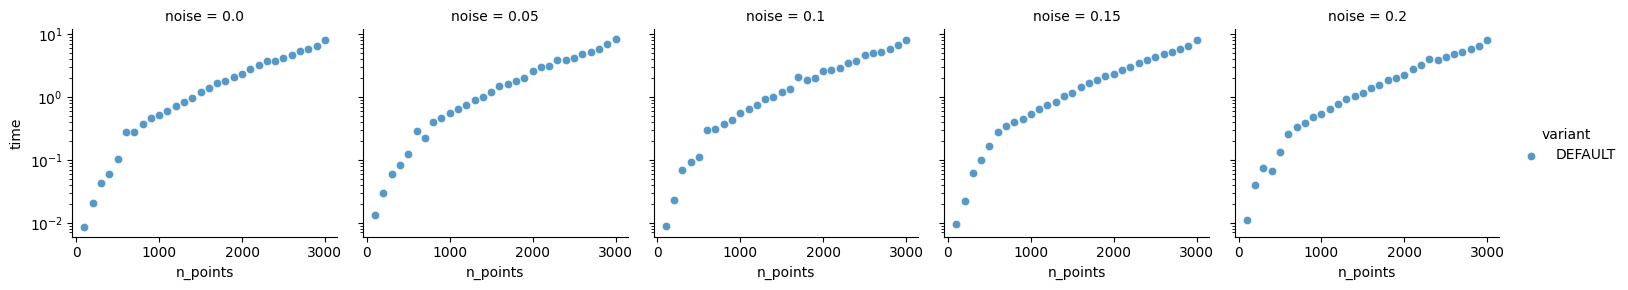

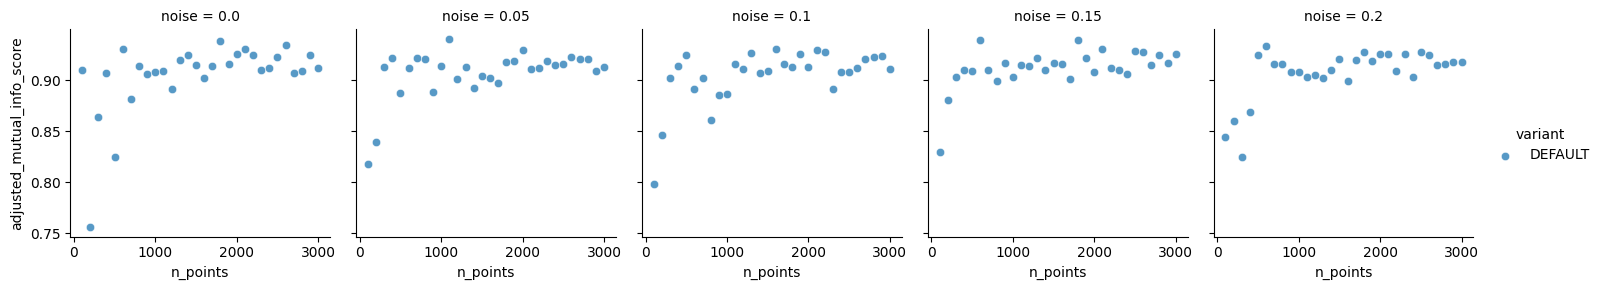

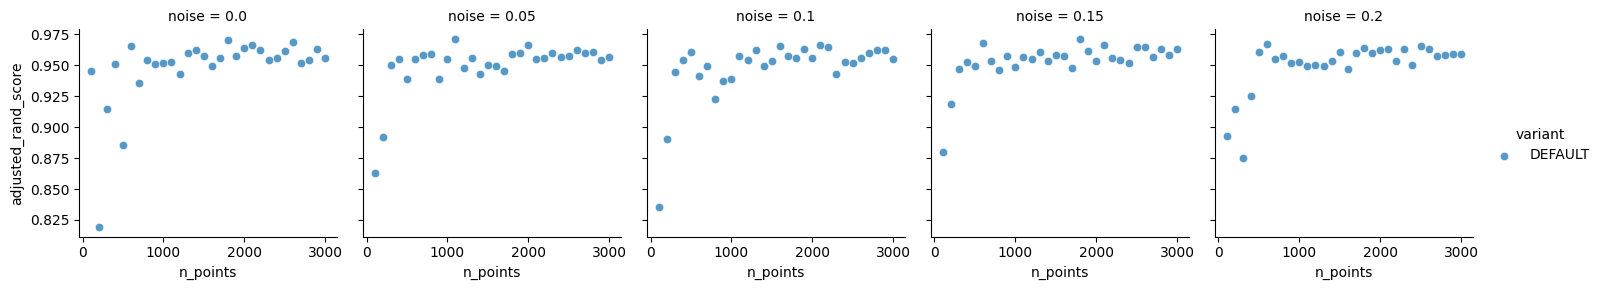

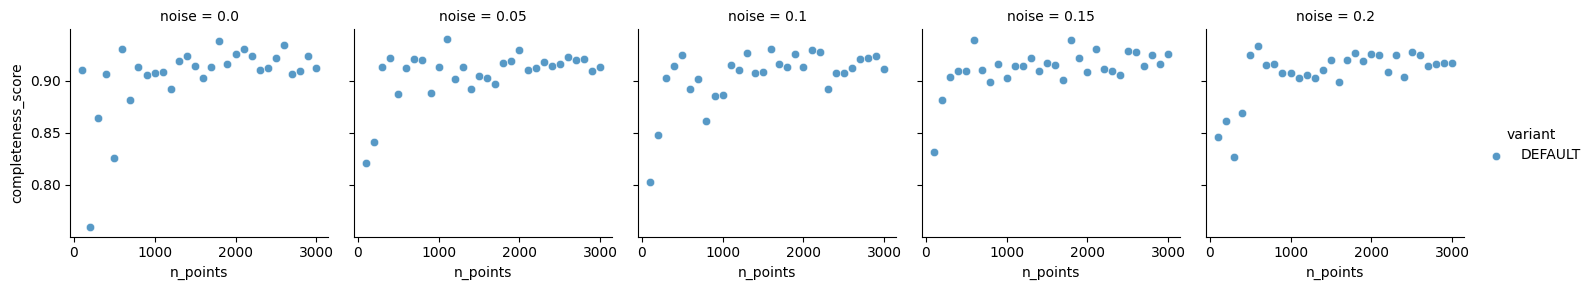

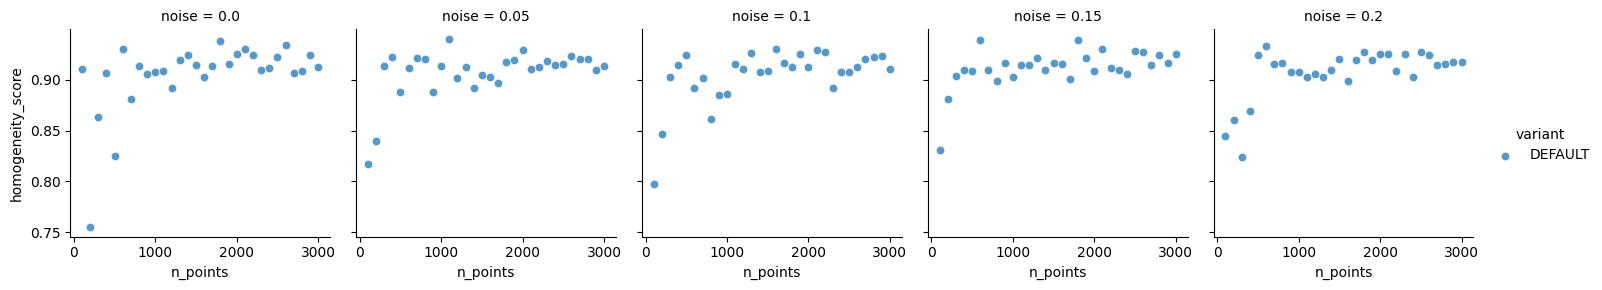

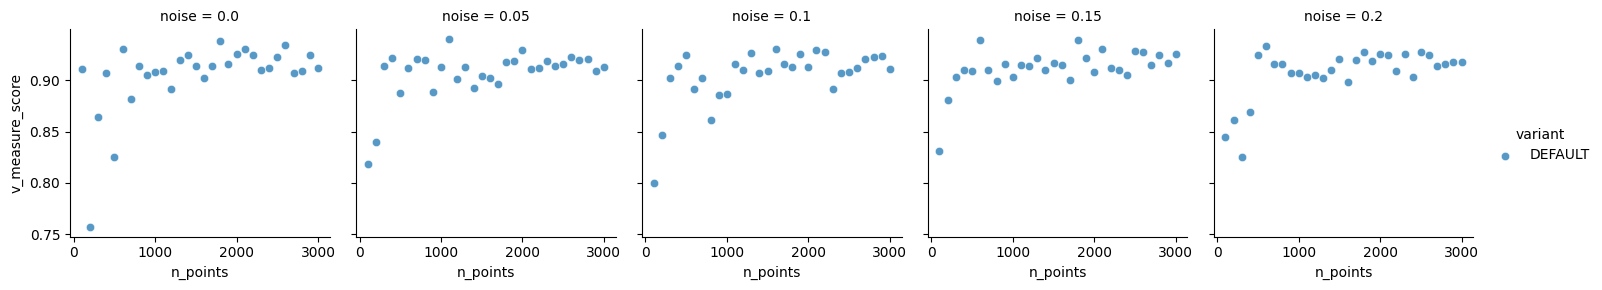

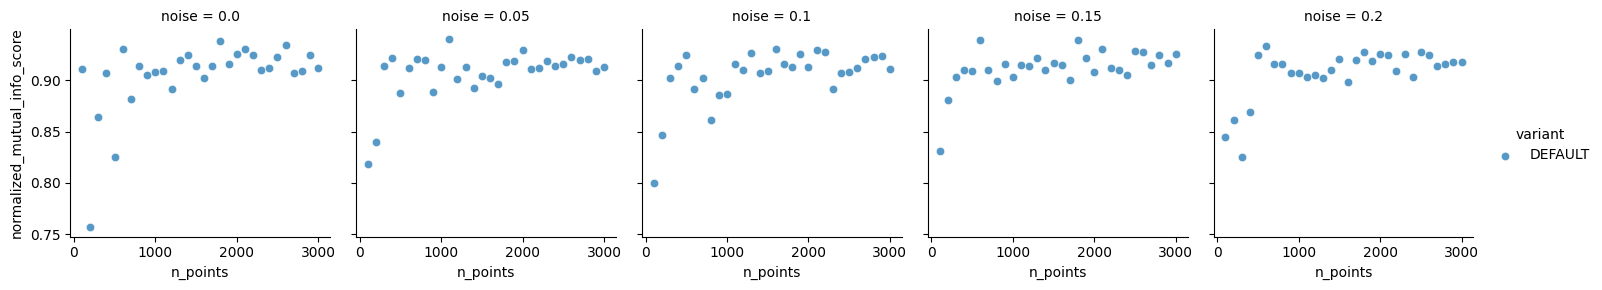

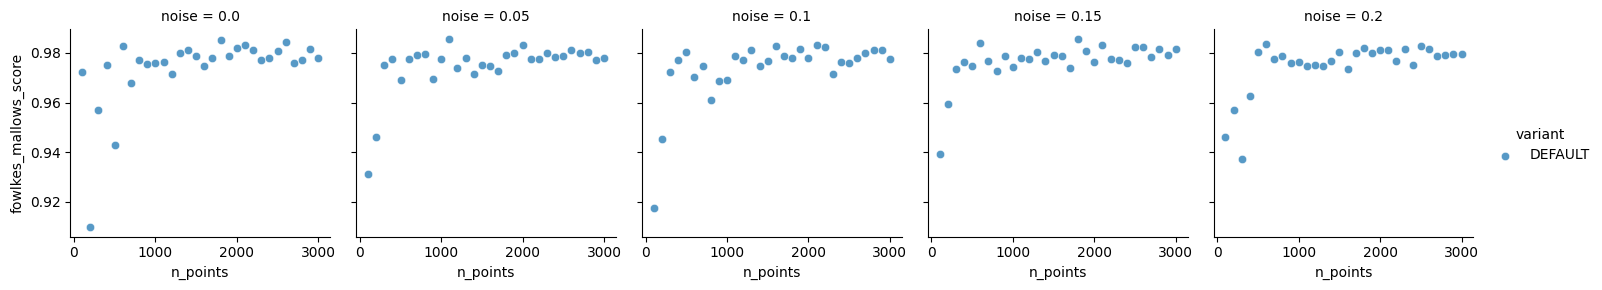

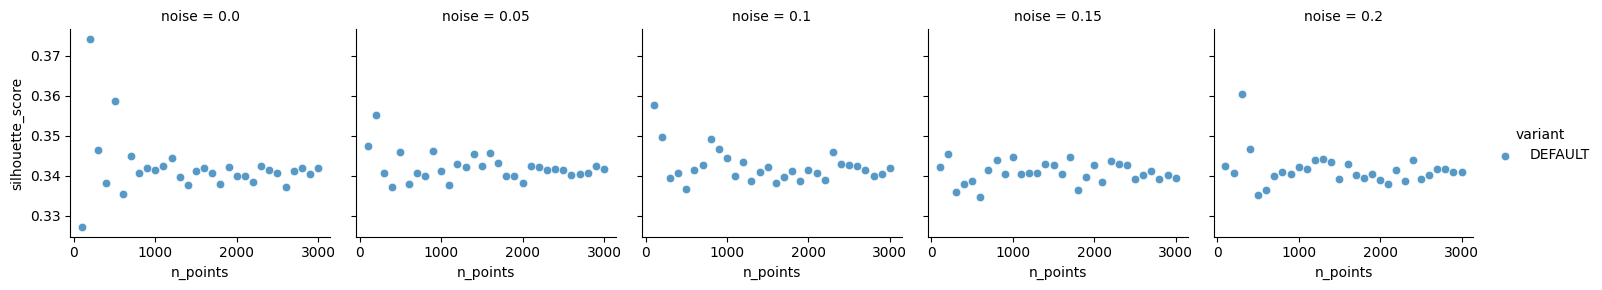

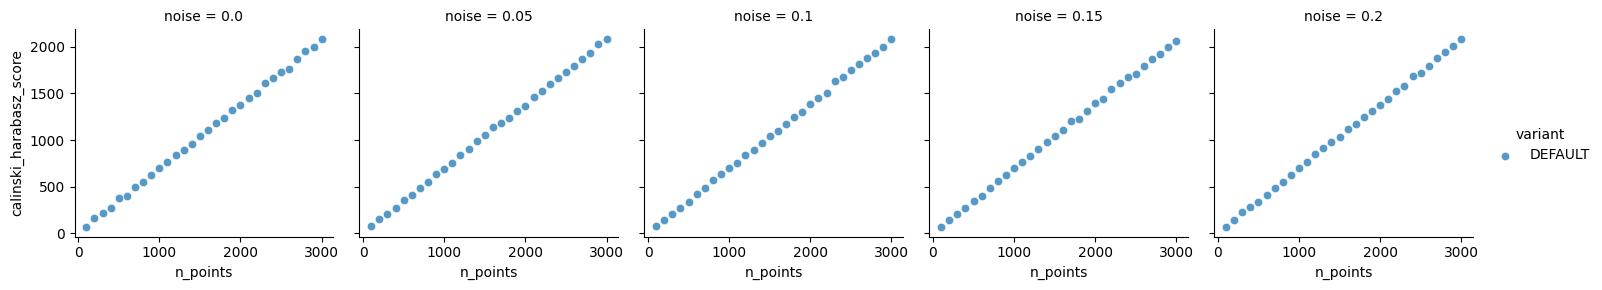

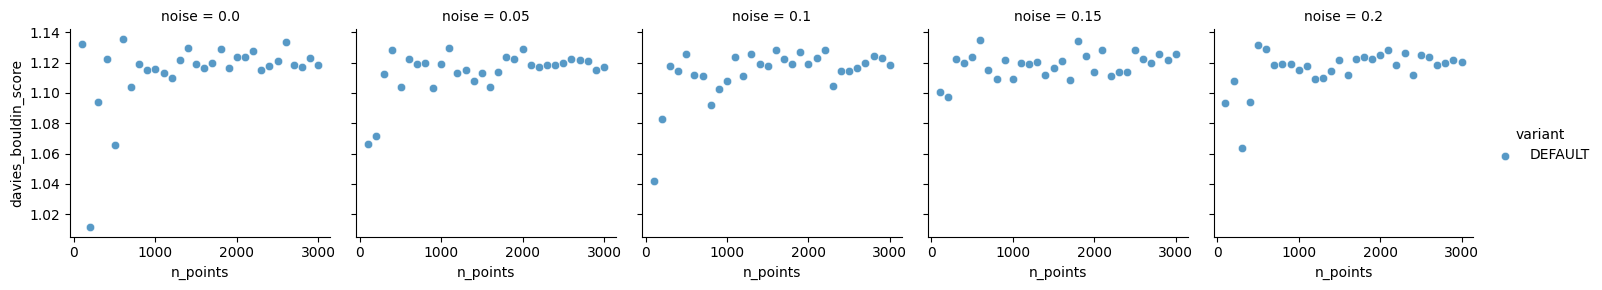

In [12]:
def show_experiment_results(experiment, metrics = DEFAULT_METRICS):

    # filter given experiment, average out over repeats
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    summarised = experiment_results.groupby(['noise', 'variant', 'n_points']).mean(True).reset_index()

    # for each metric to plot, show a (single row) facetgrid 
    for metric in metrics:
        g = sns.FacetGrid(summarised, col="noise", hue='variant')
        g.map_dataframe(sns.scatterplot, "n_points", metric, alpha = 0.75)
        g.add_legend()
        if metric == 'time':
            plt.yscale('log')
        plt.show()

show_experiment_results('DEFAULT')

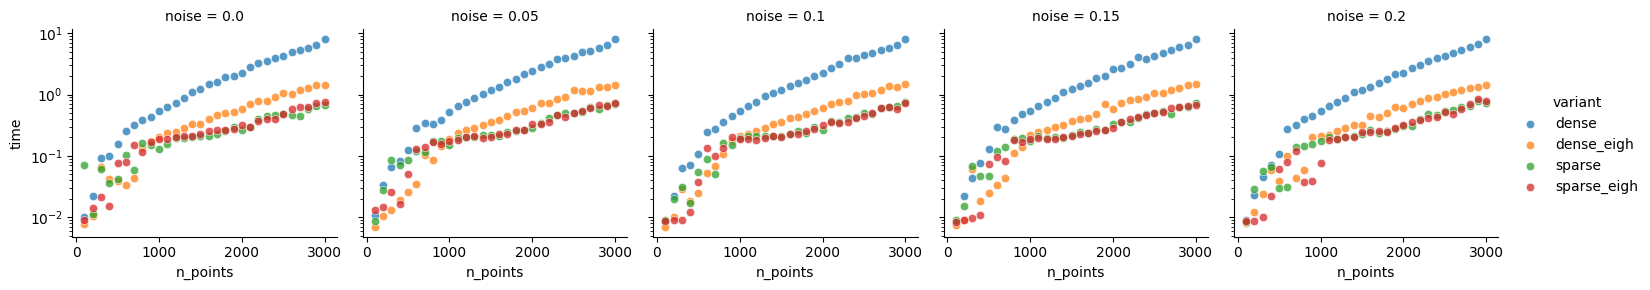

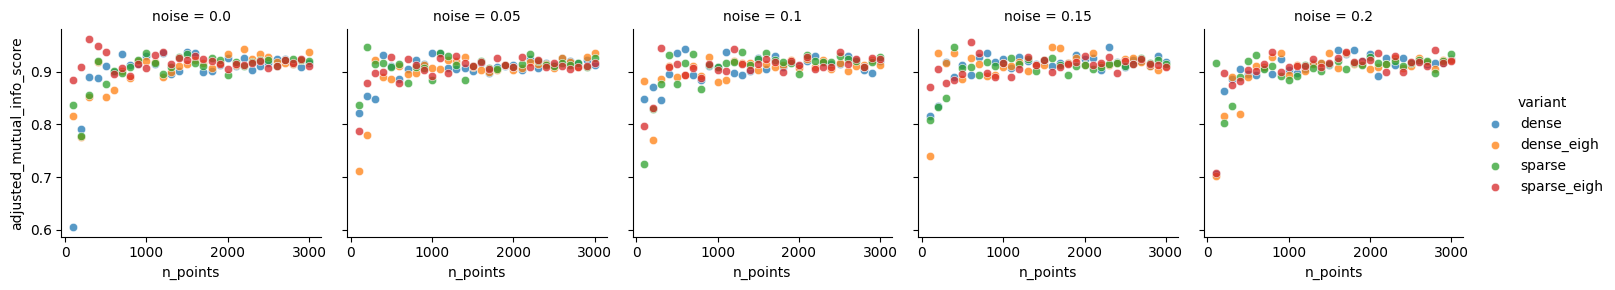

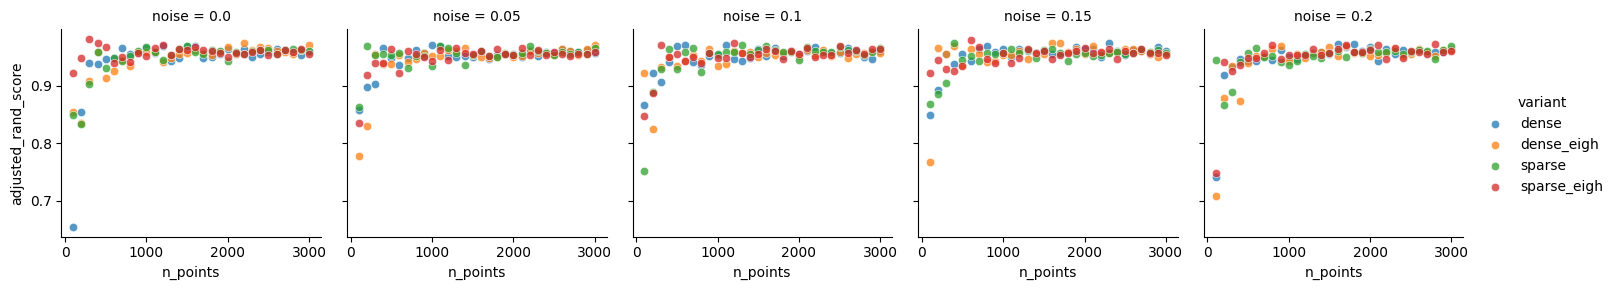

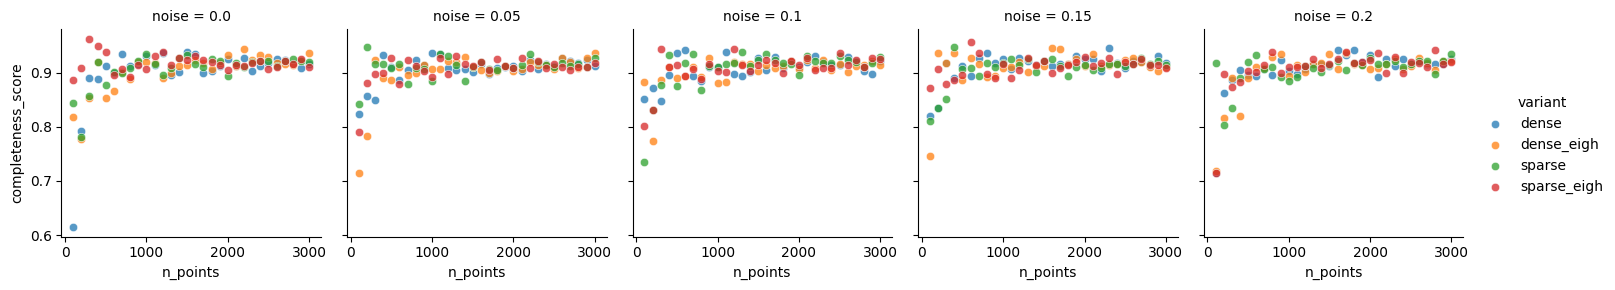

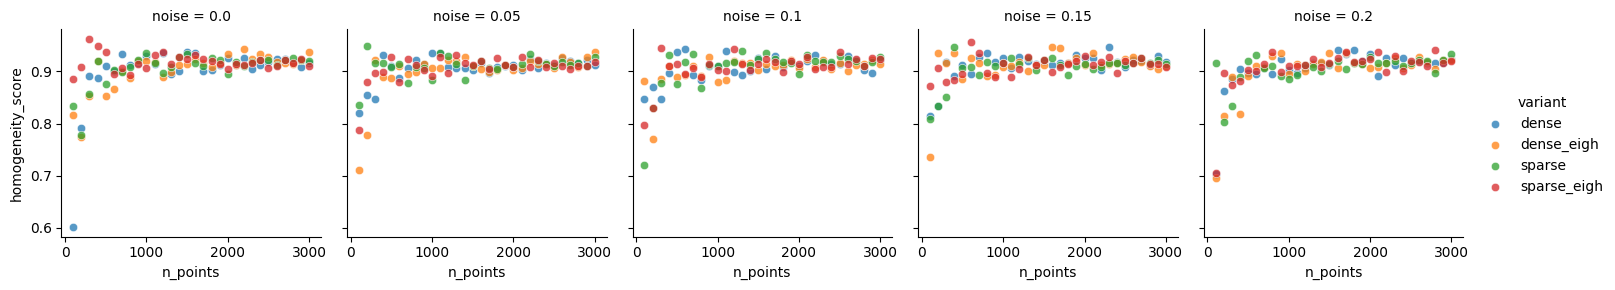

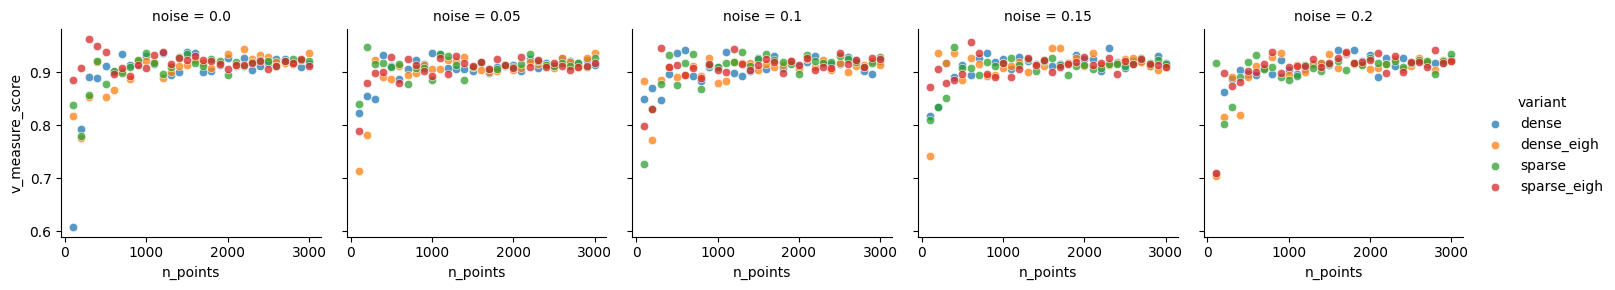

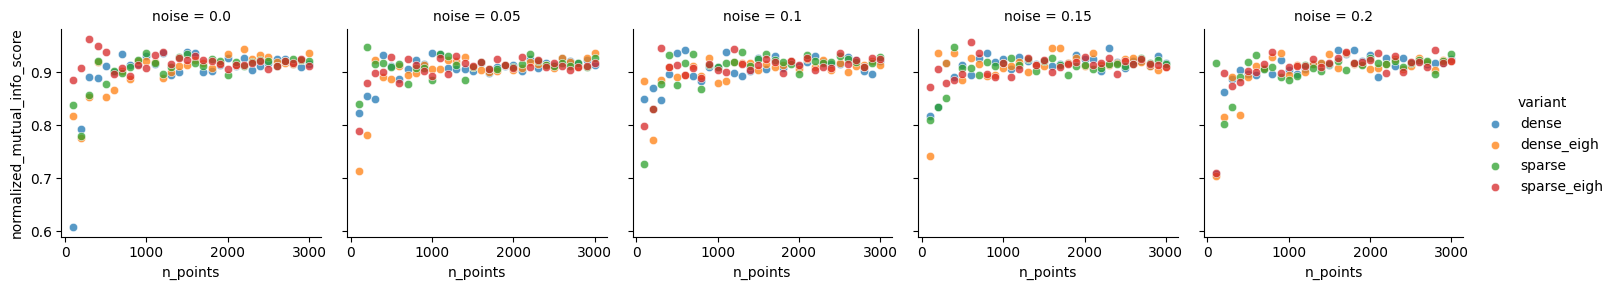

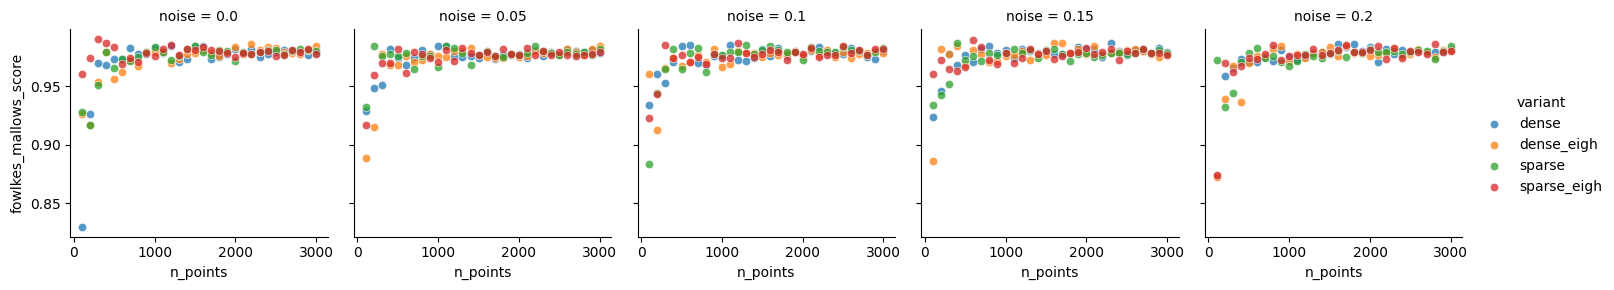

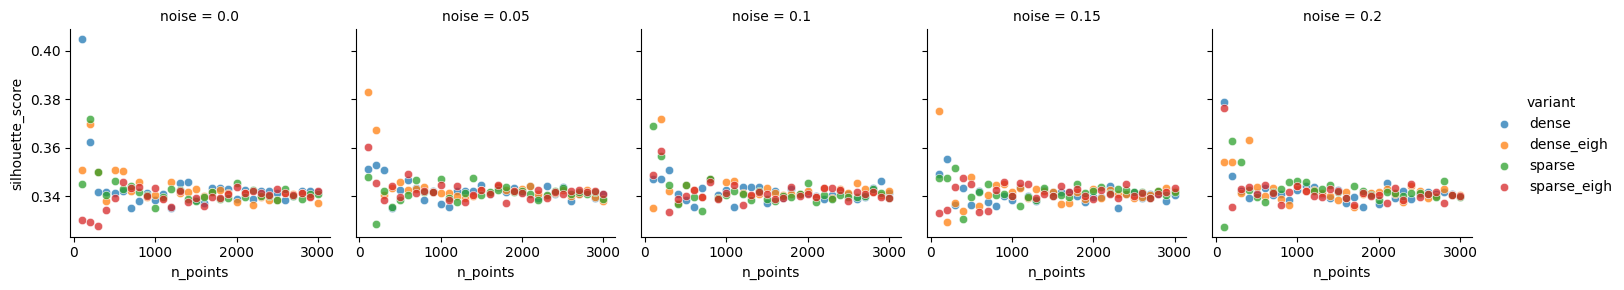

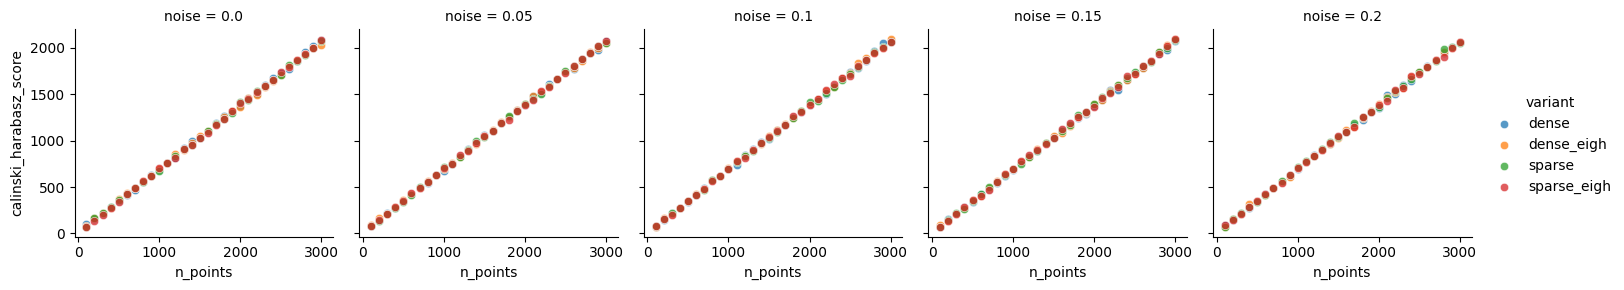

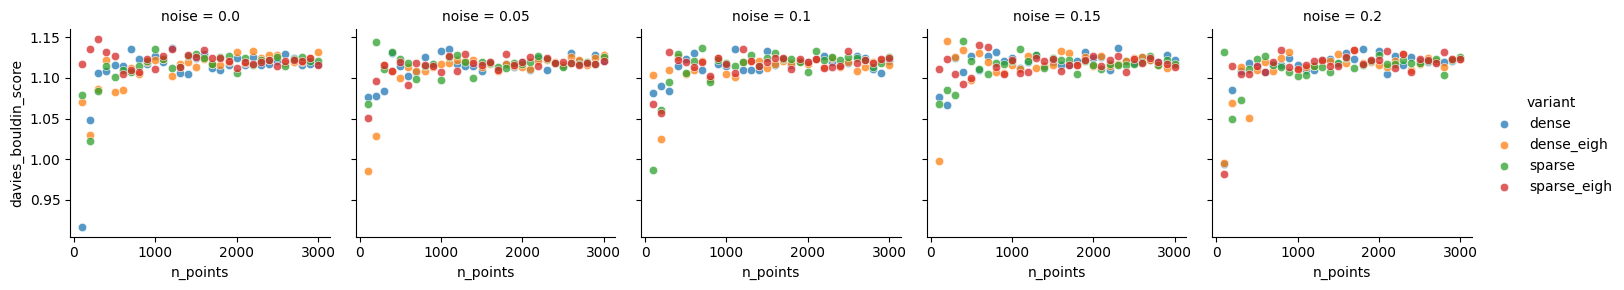

In [13]:
show_experiment_results('Decomposition')

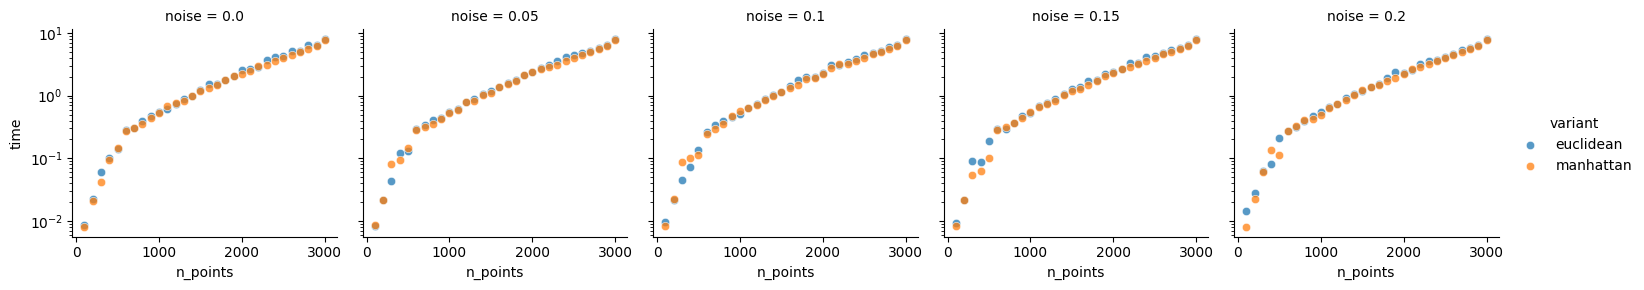

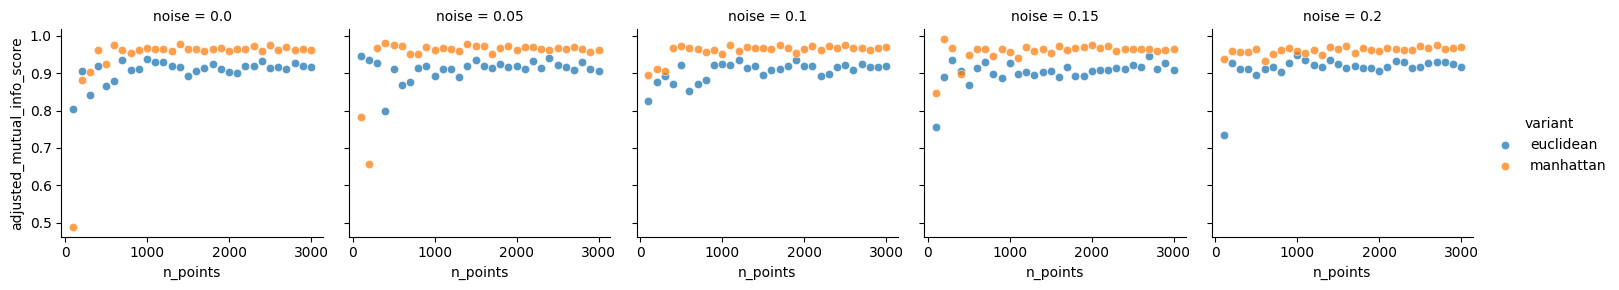

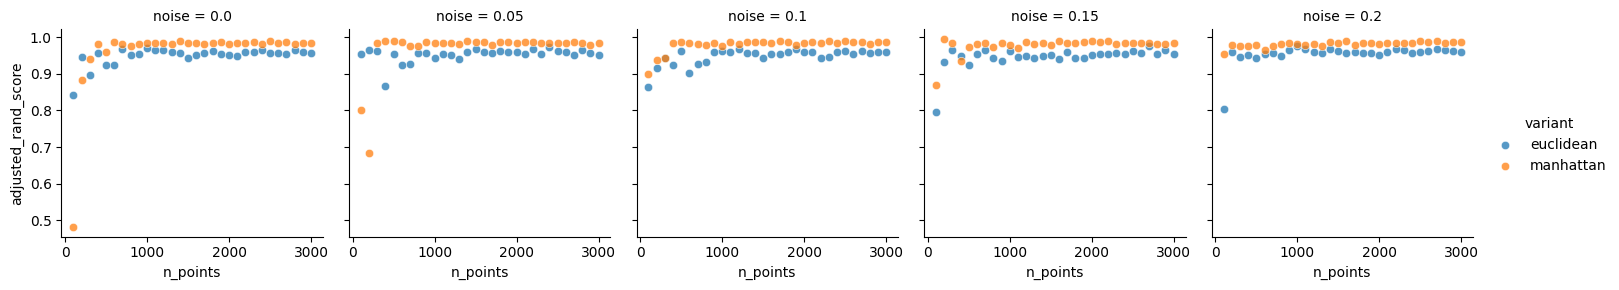

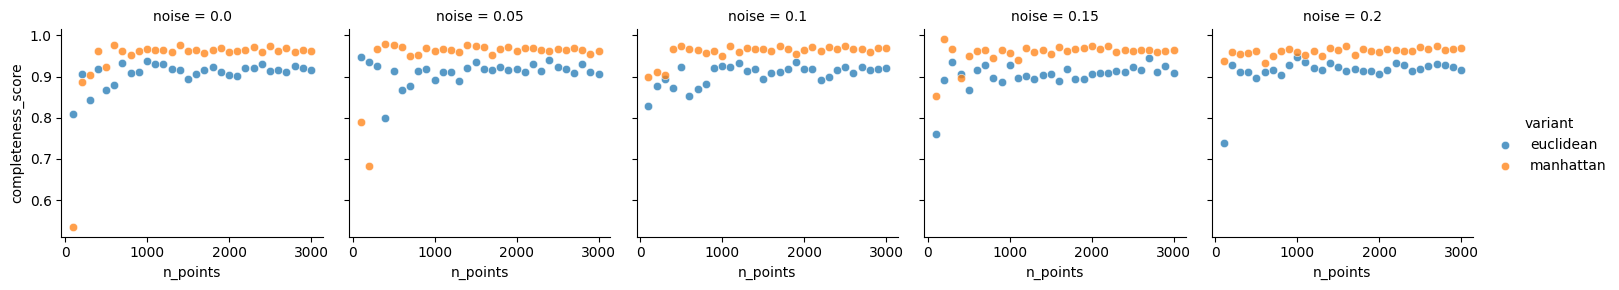

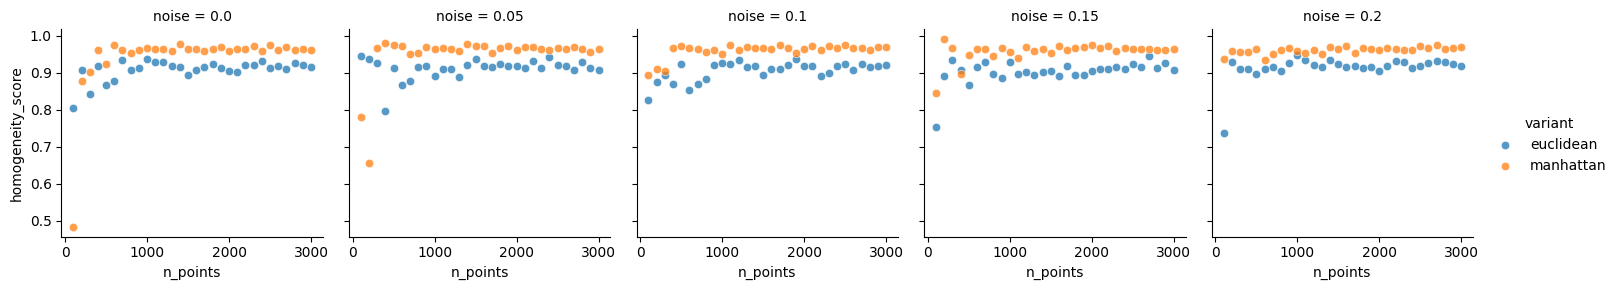

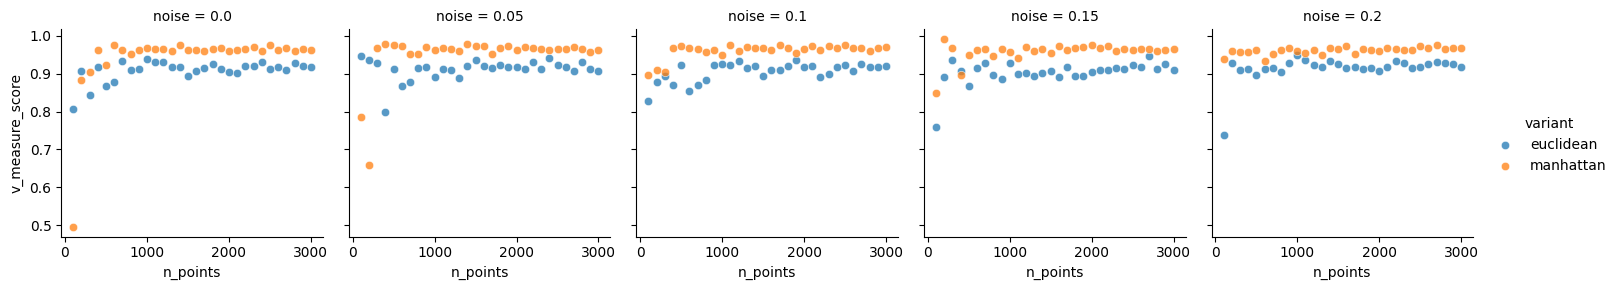

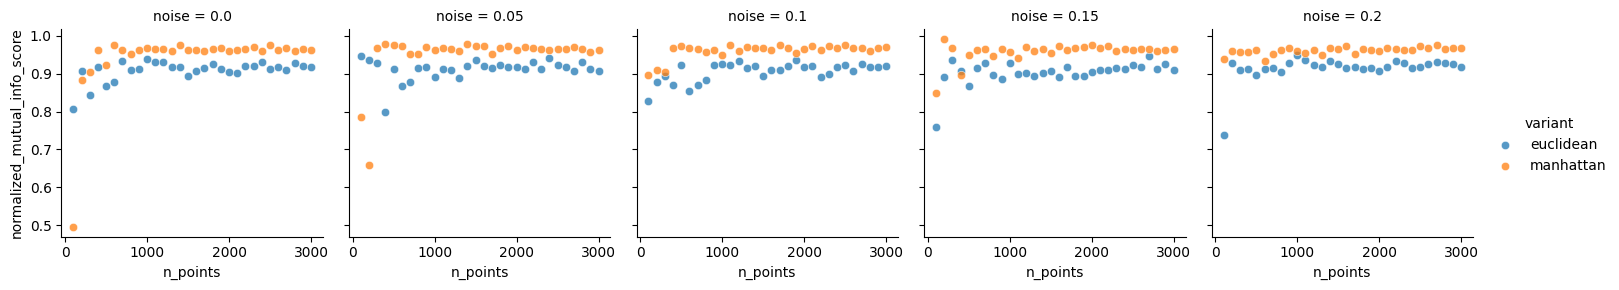

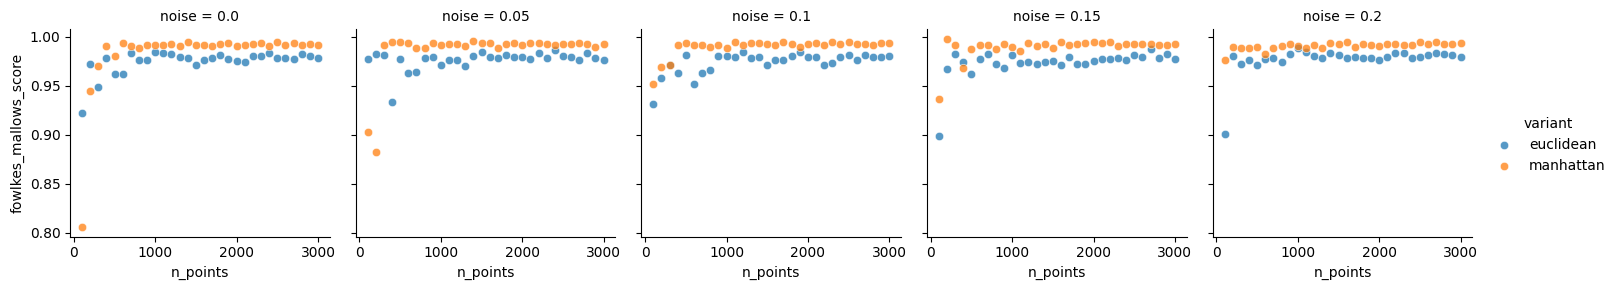

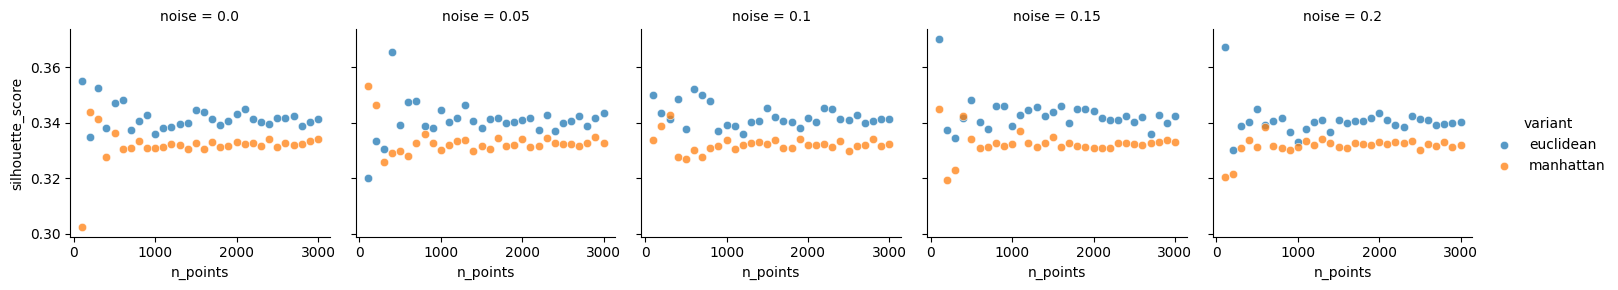

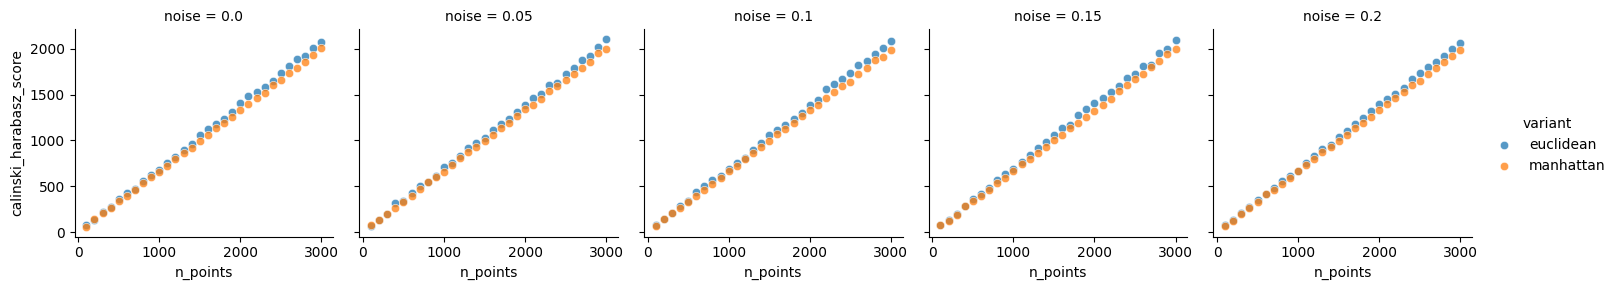

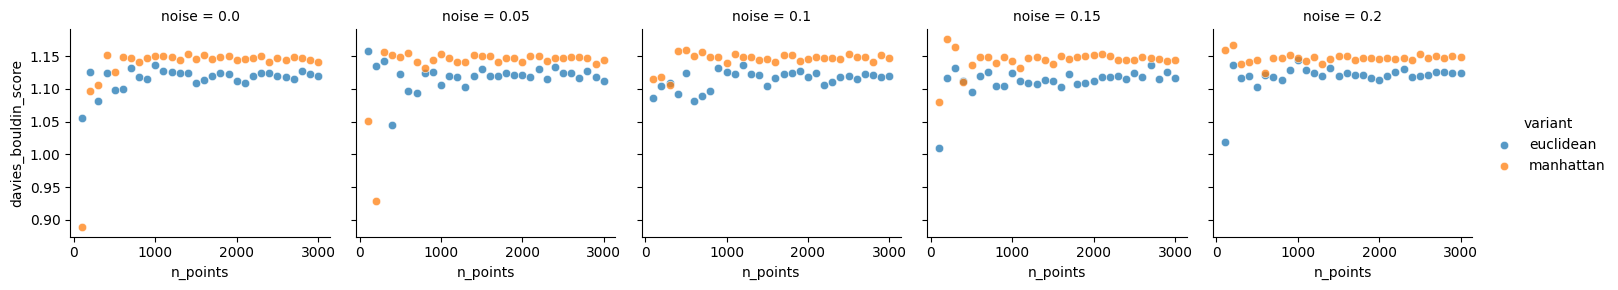

In [14]:
show_experiment_results('Affinity')

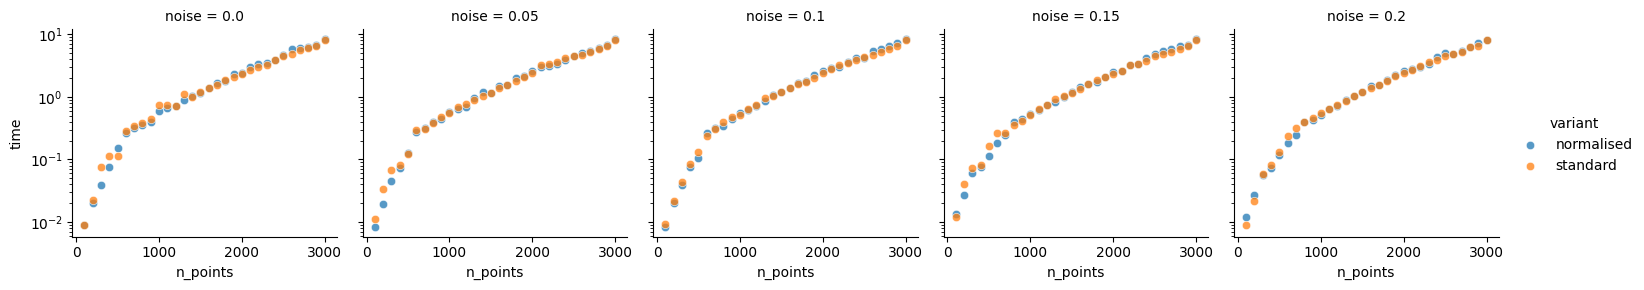

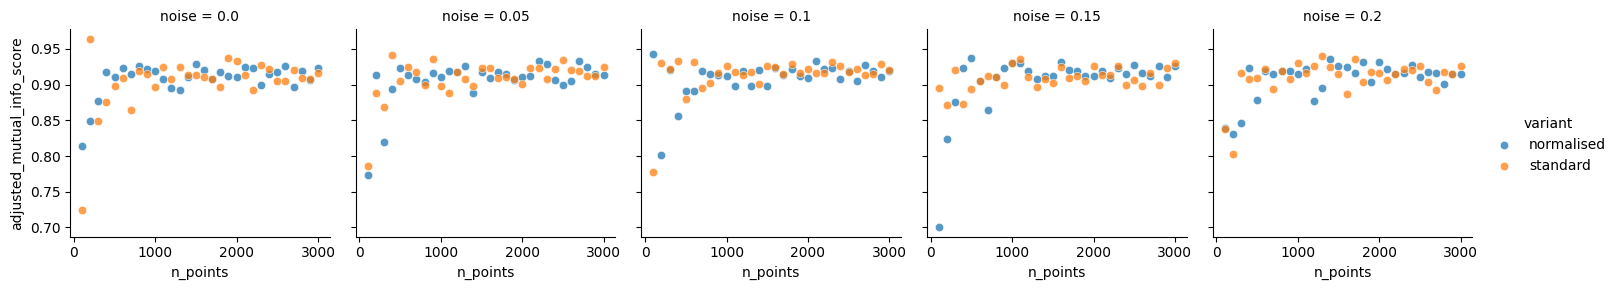

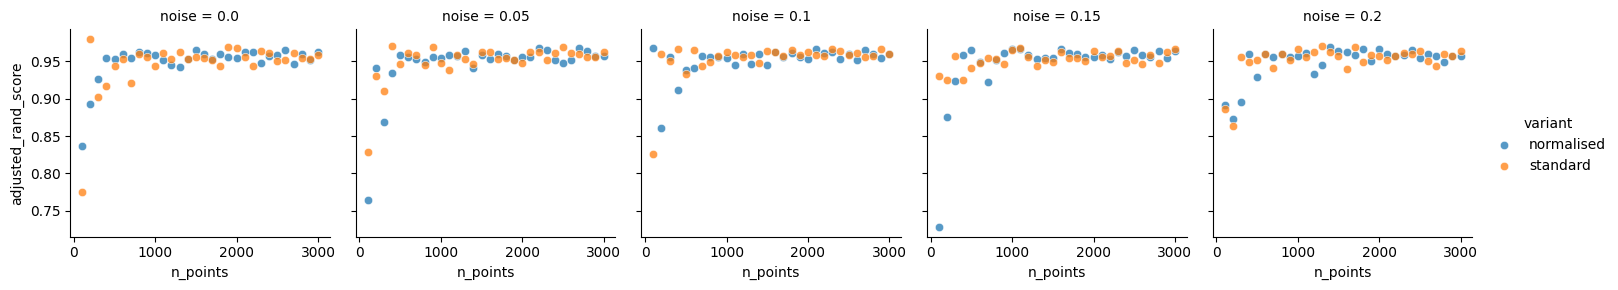

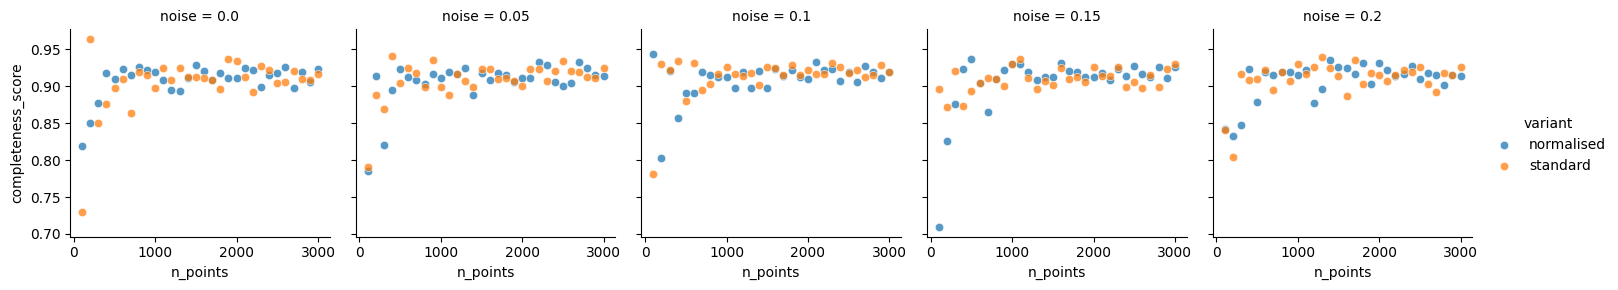

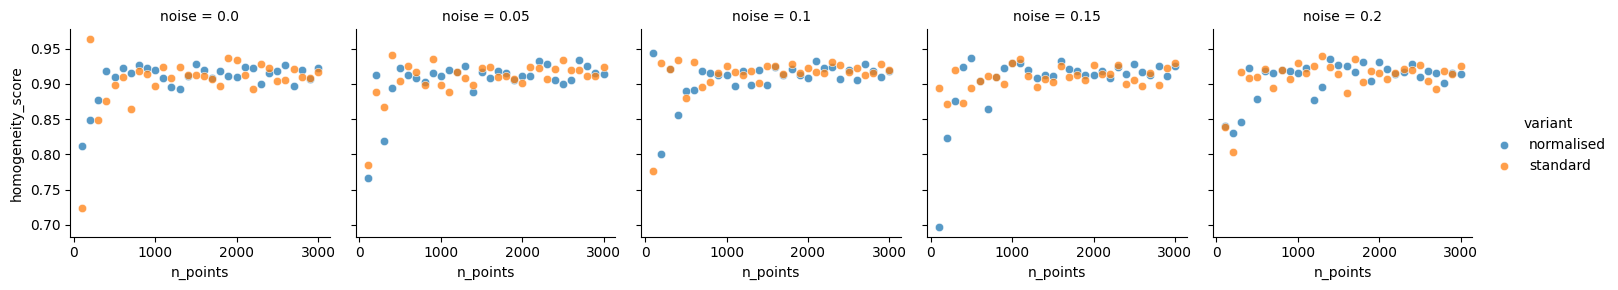

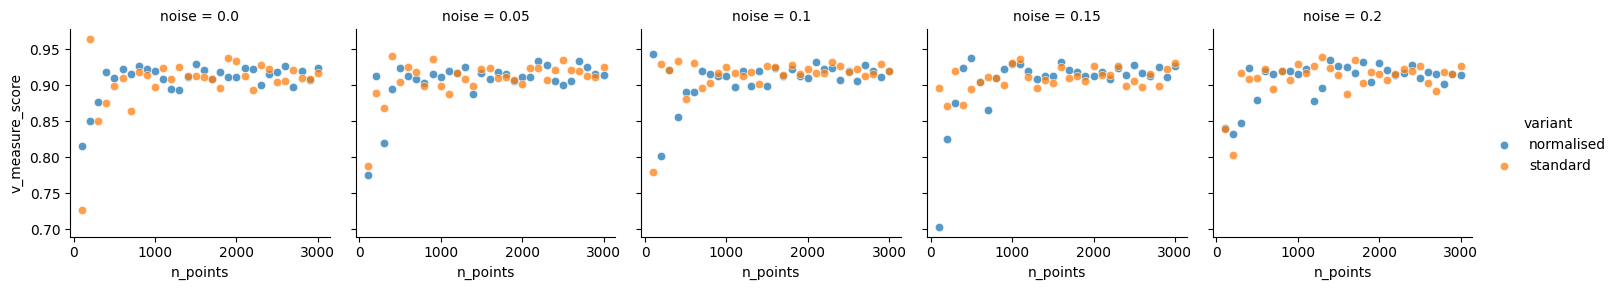

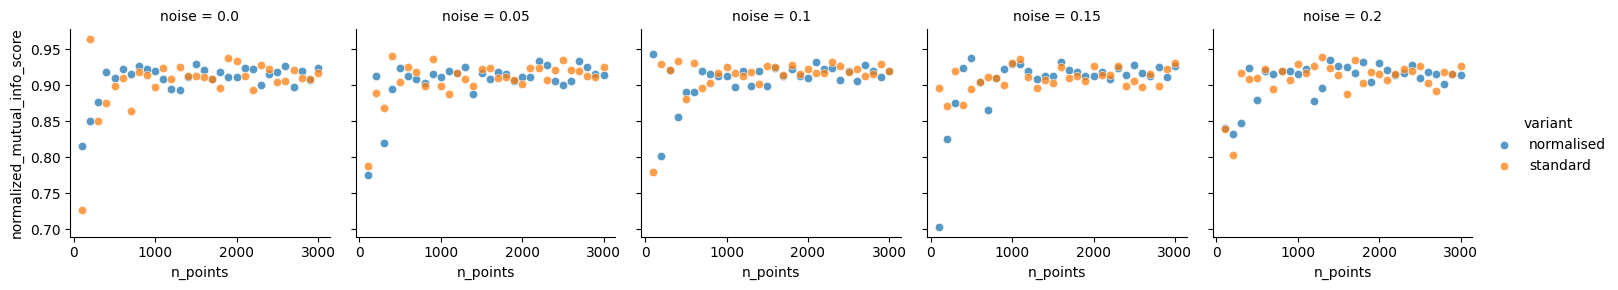

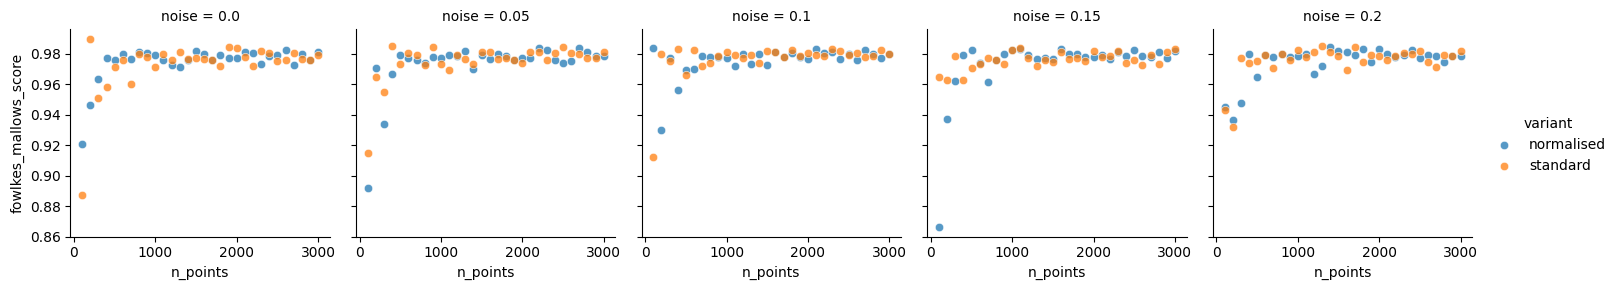

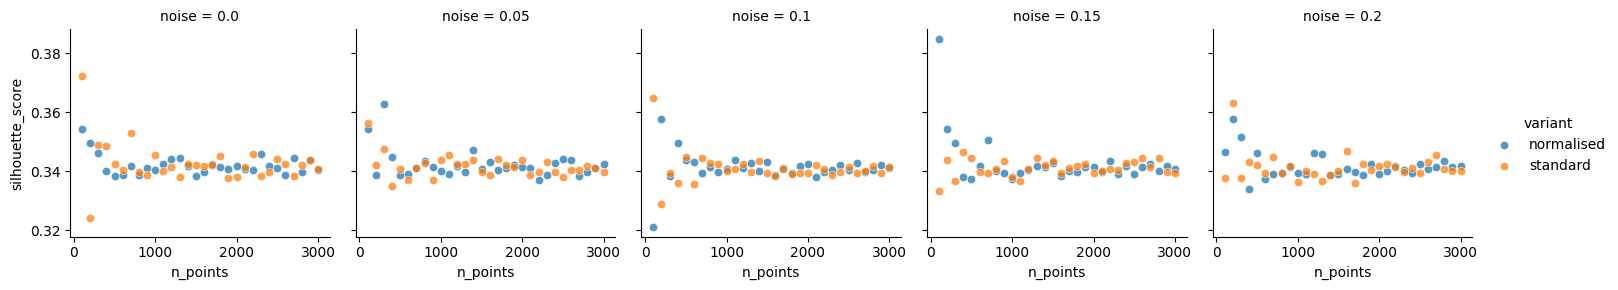

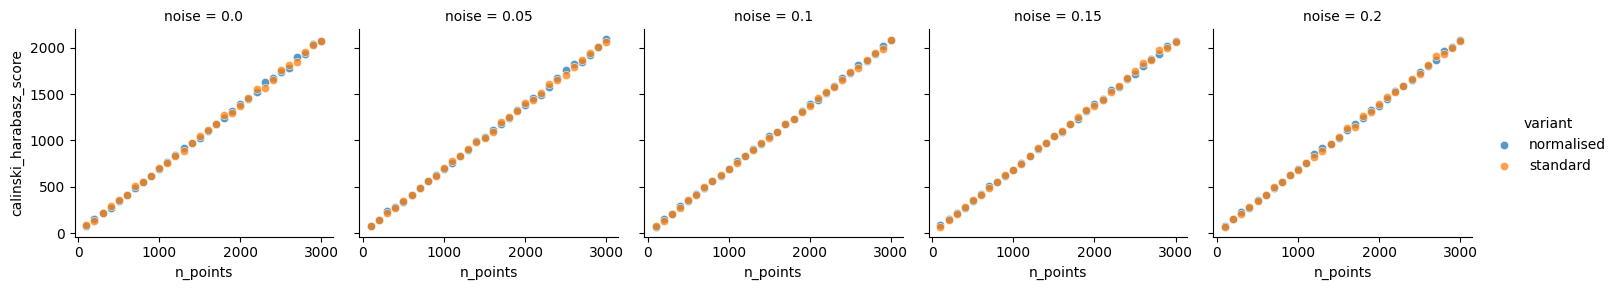

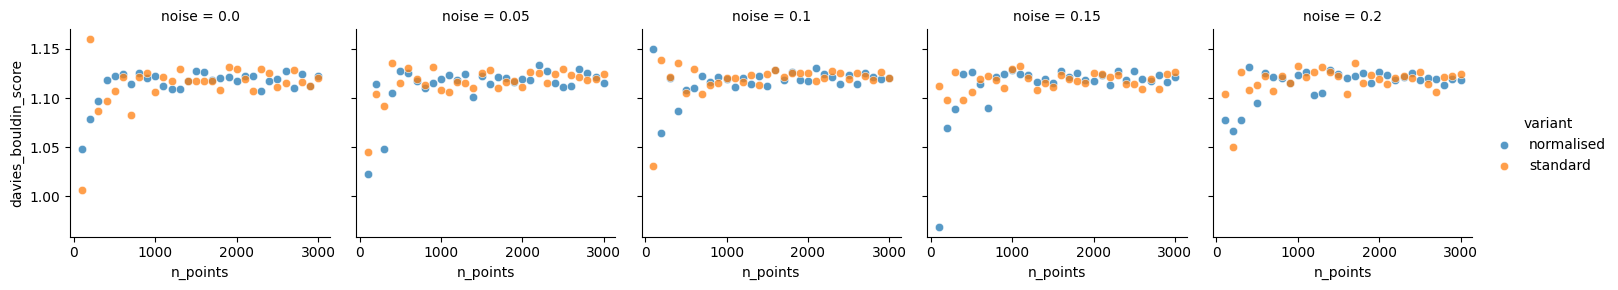

In [15]:
show_experiment_results('Laplacian')

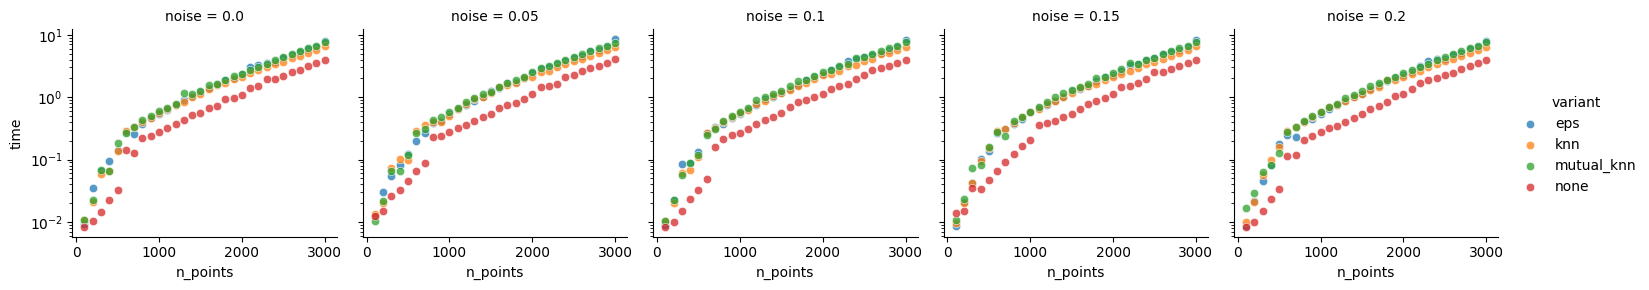

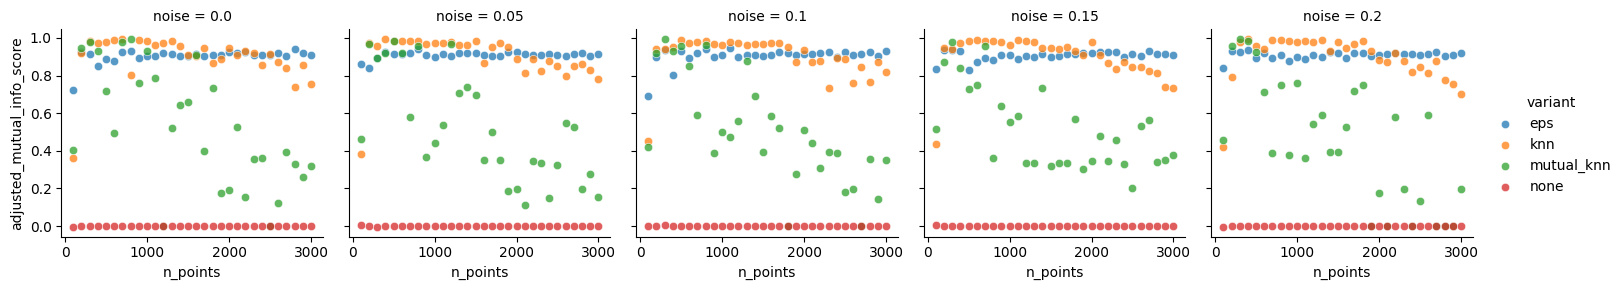

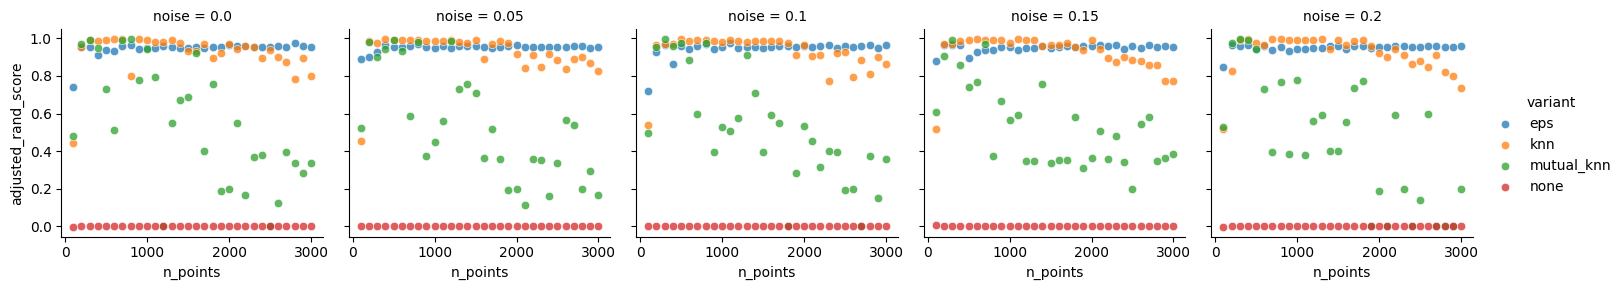

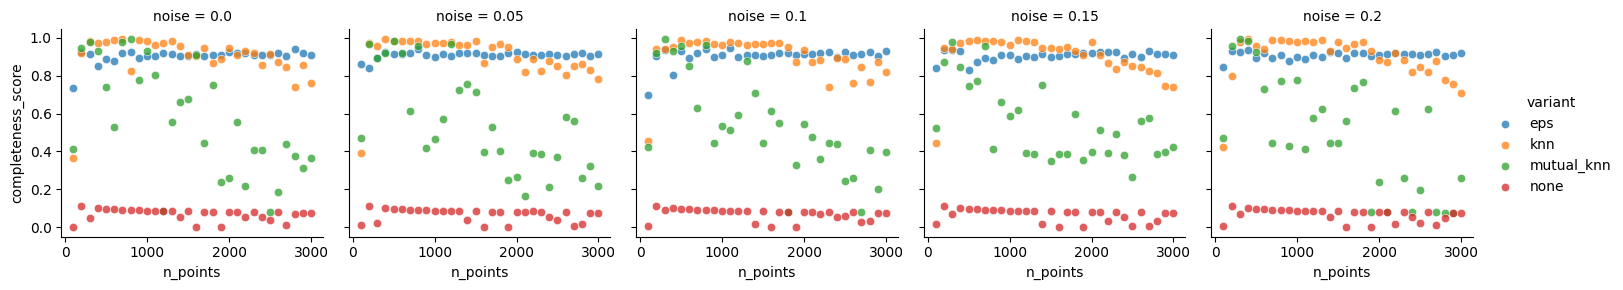

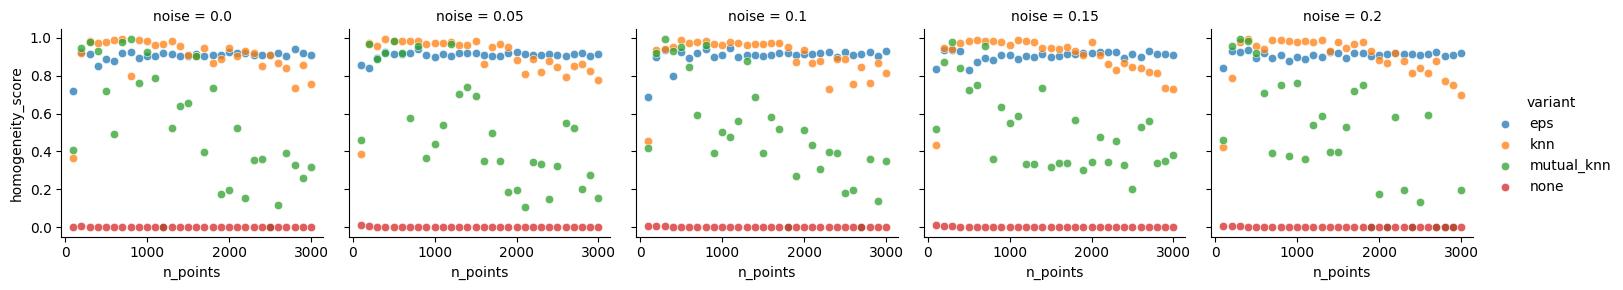

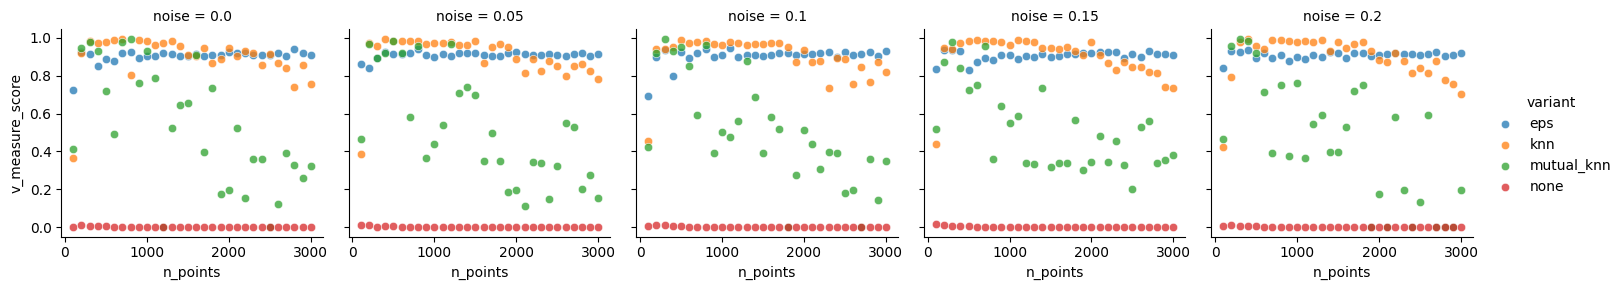

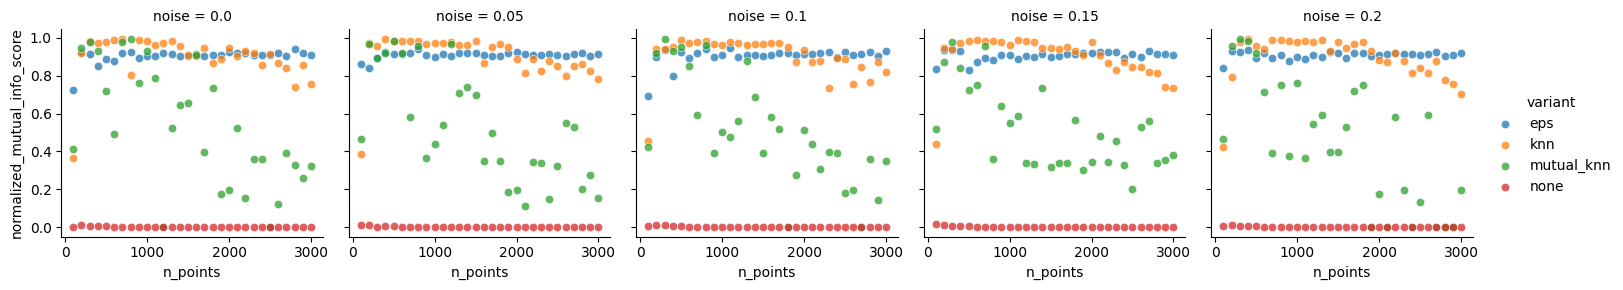

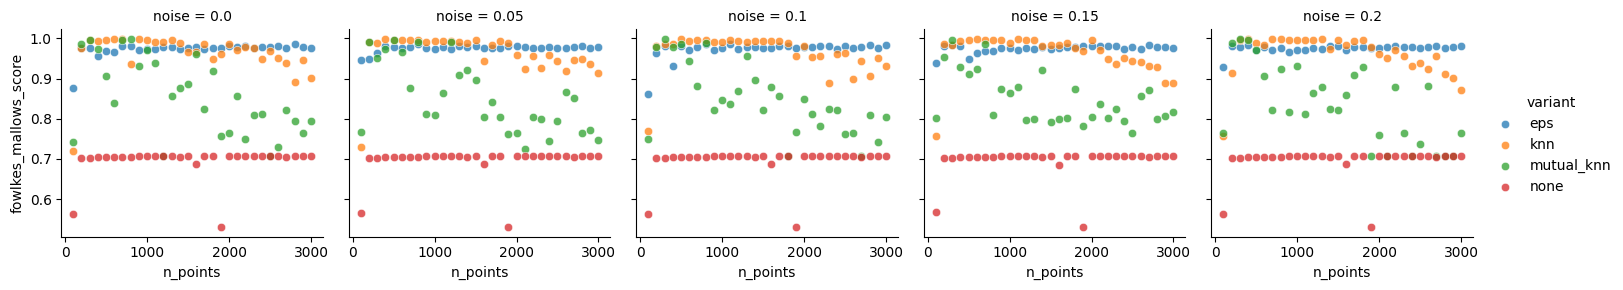

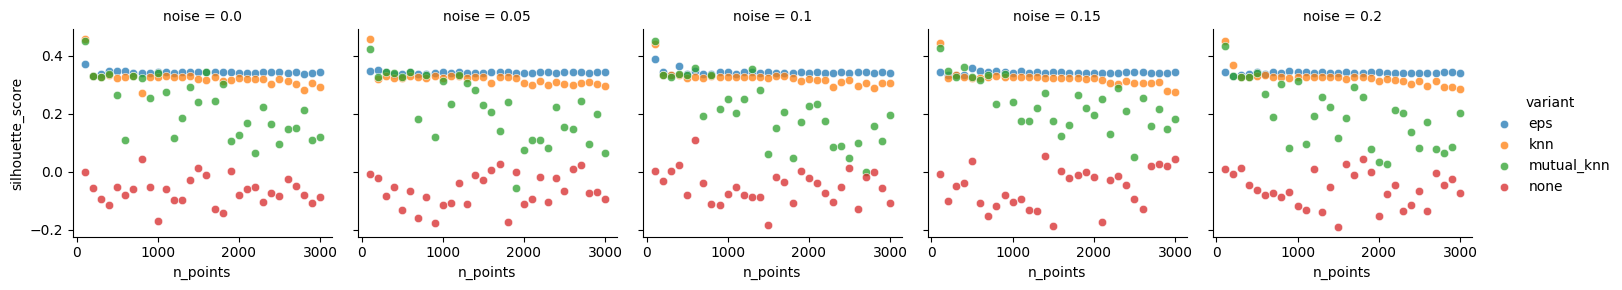

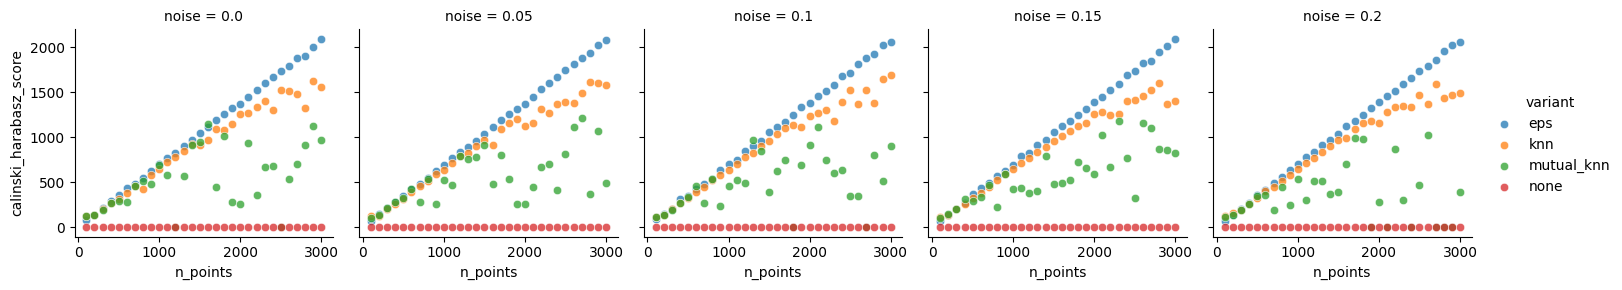

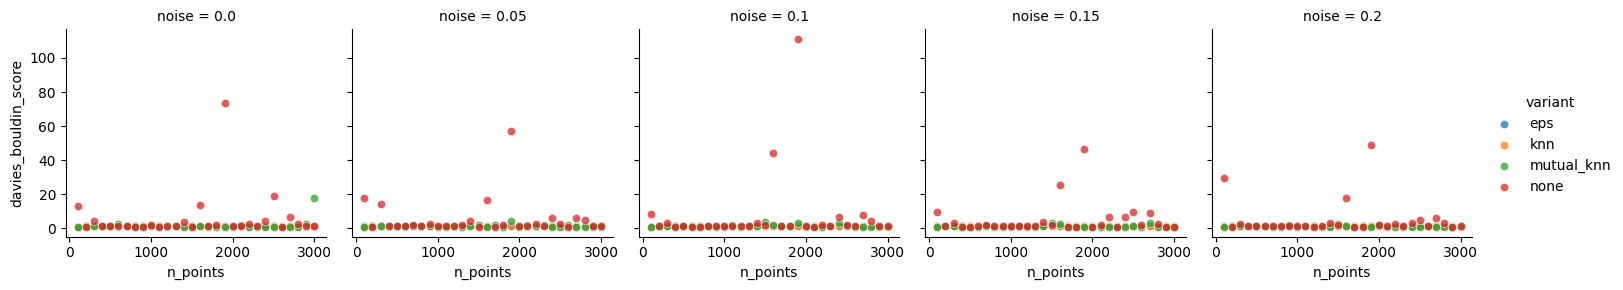

In [16]:
show_experiment_results('Refinement')

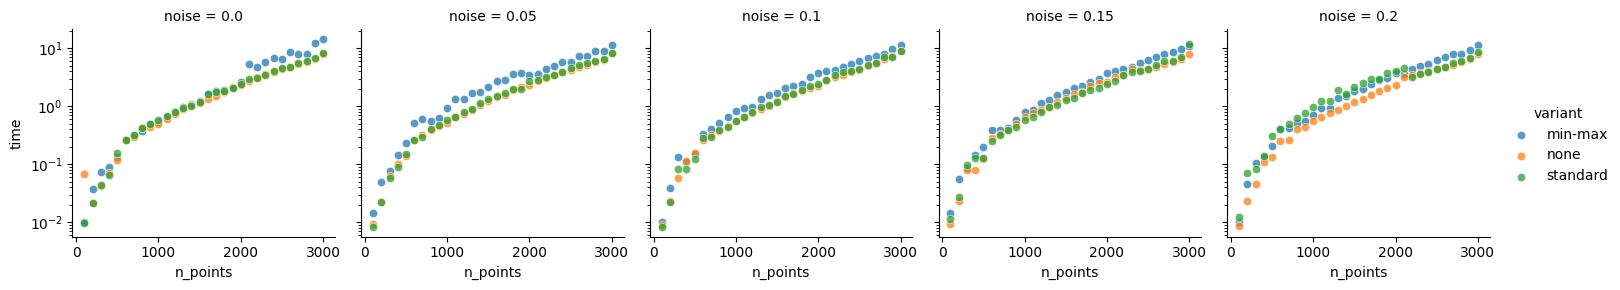

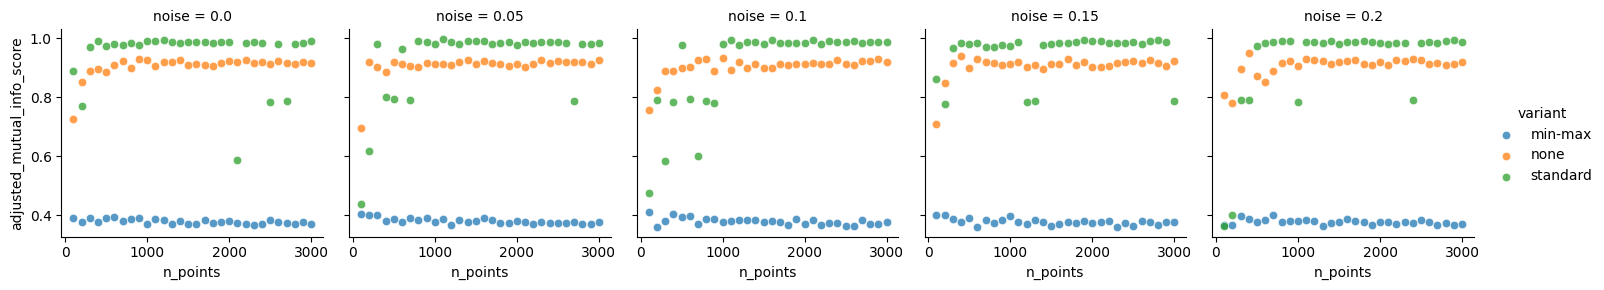

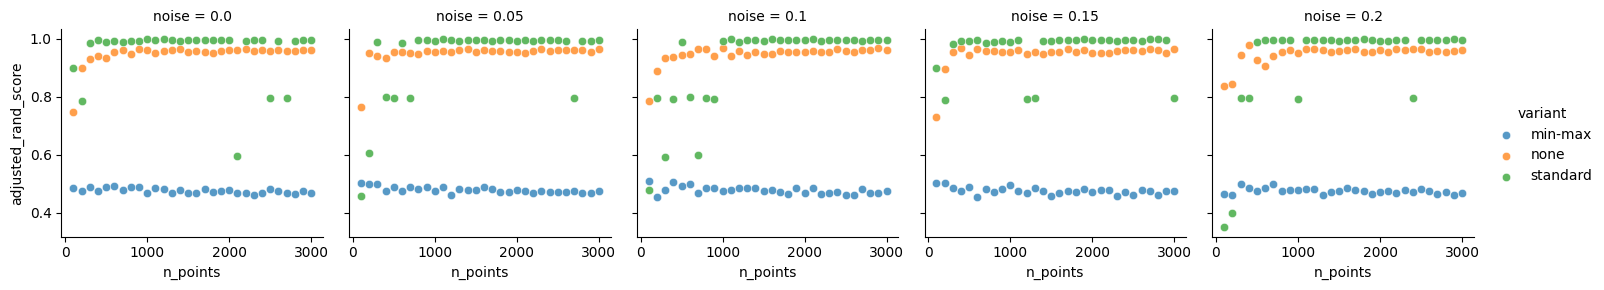

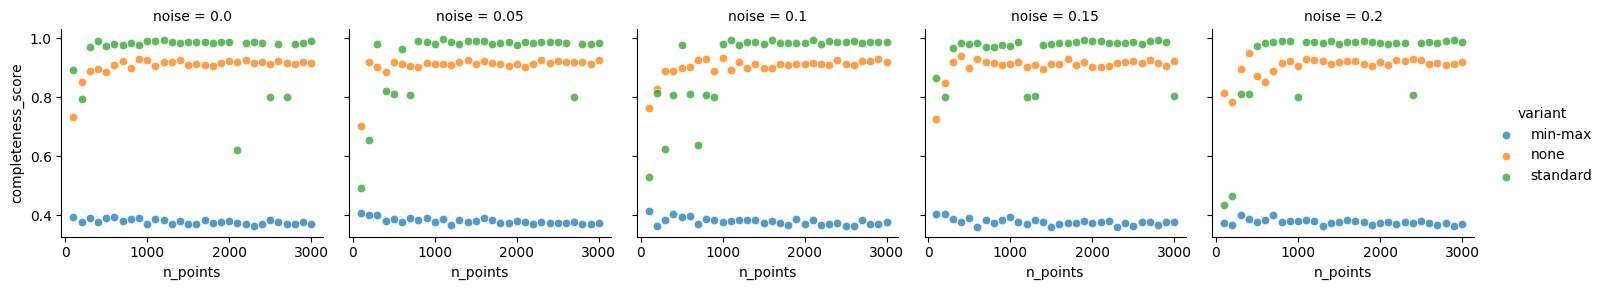

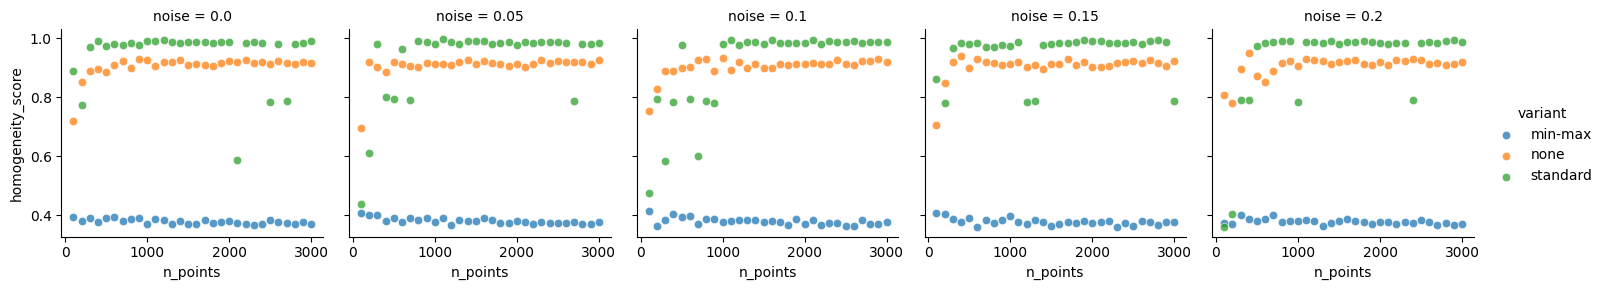

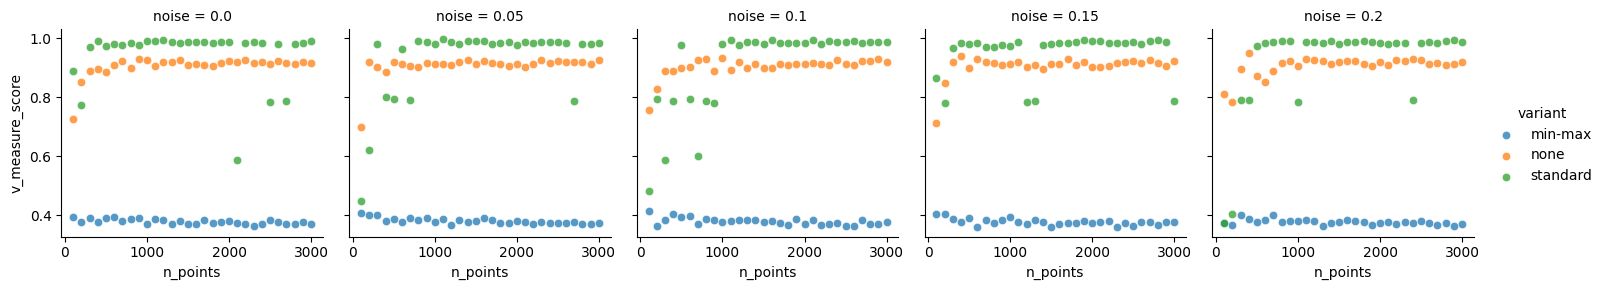

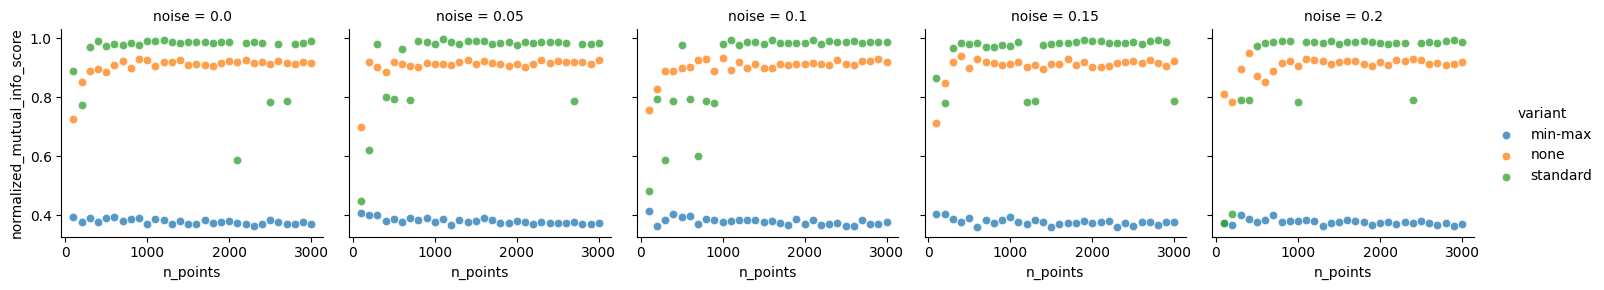

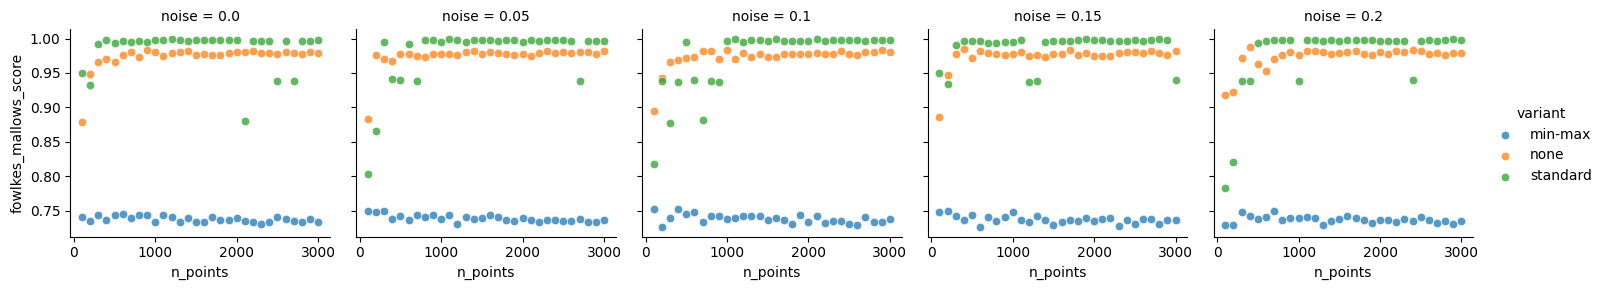

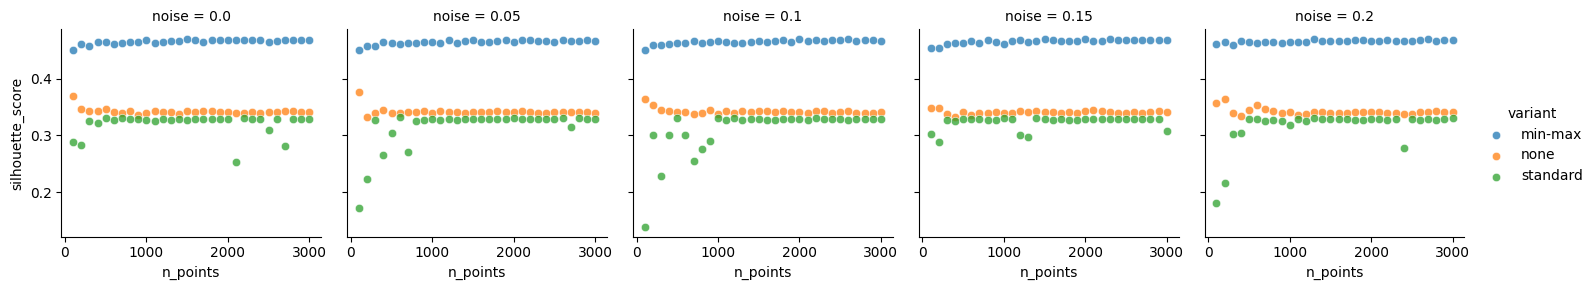

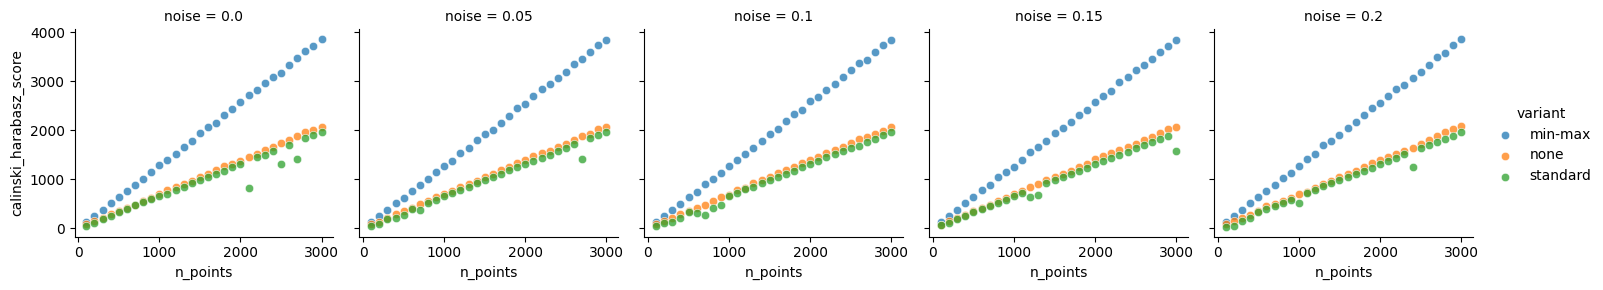

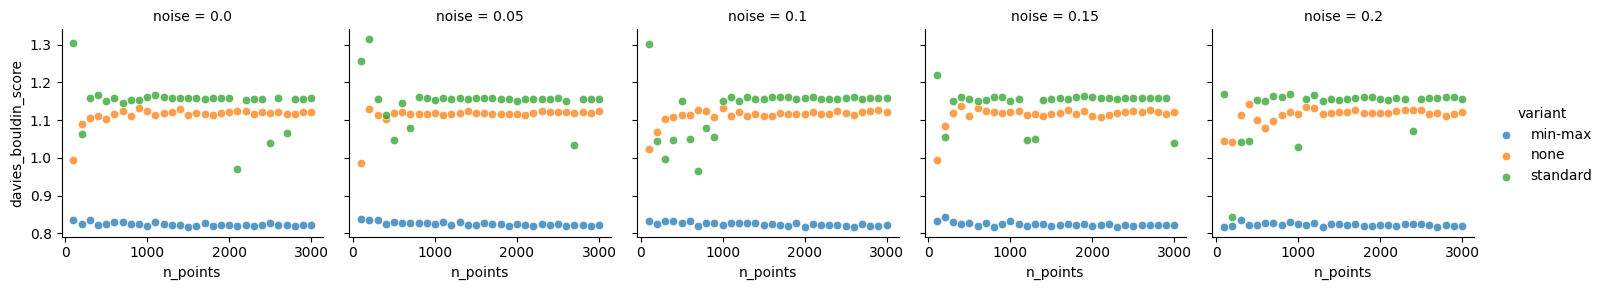

In [17]:
show_experiment_results('Standardisation')

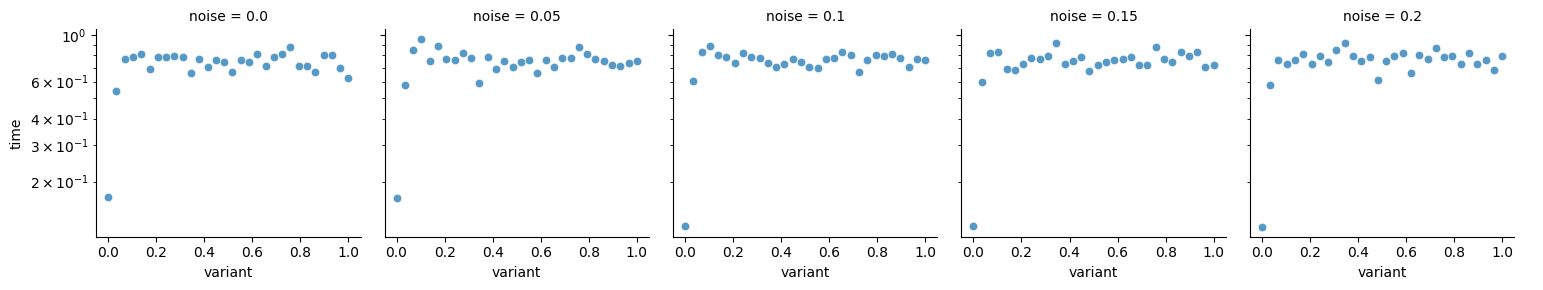

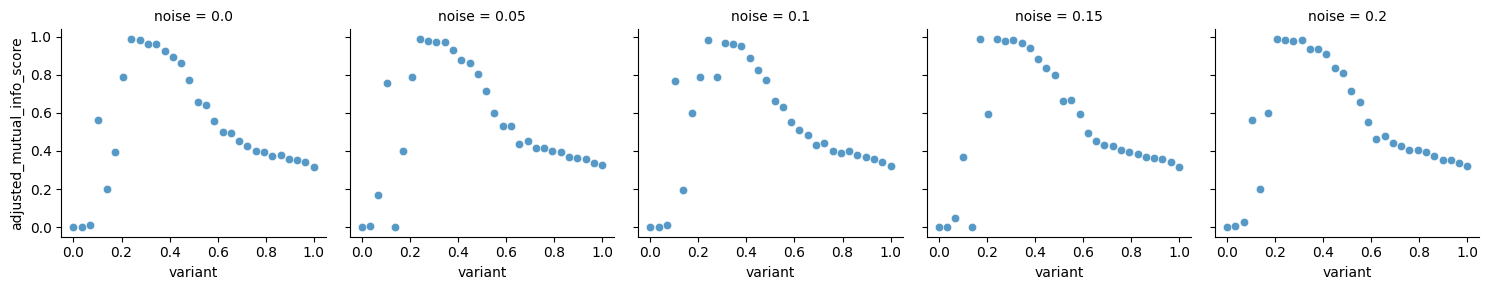

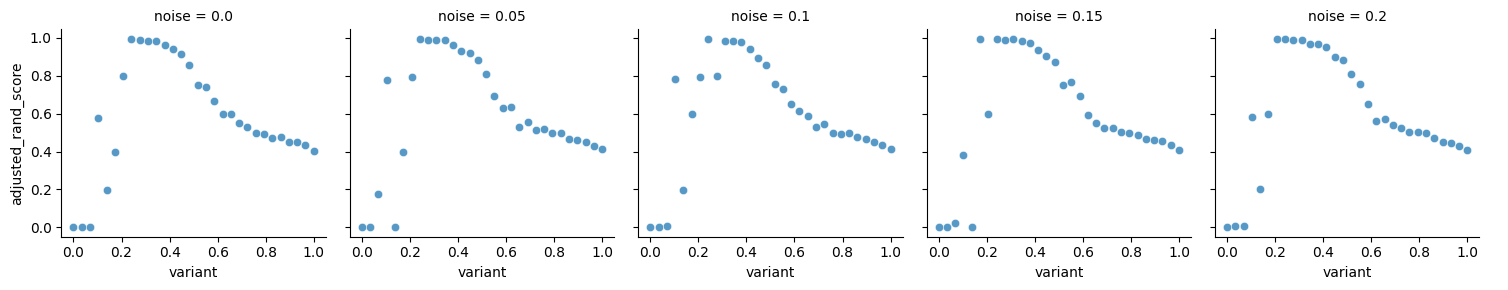

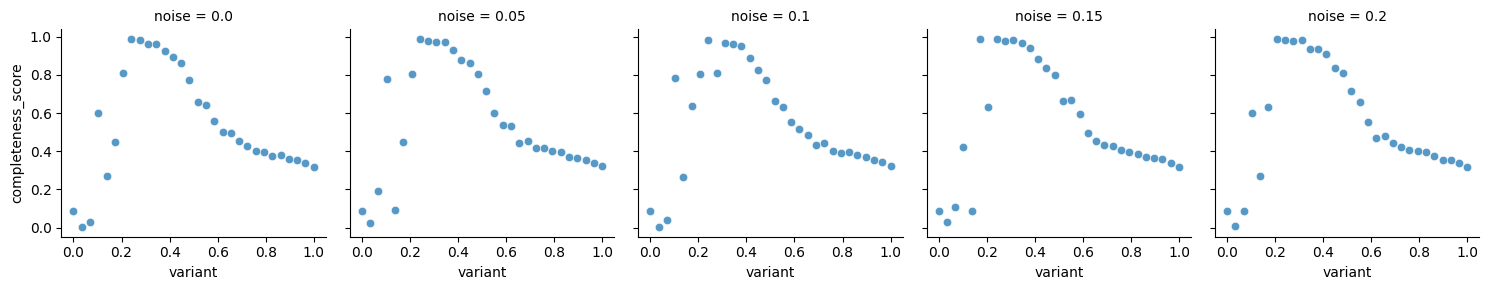

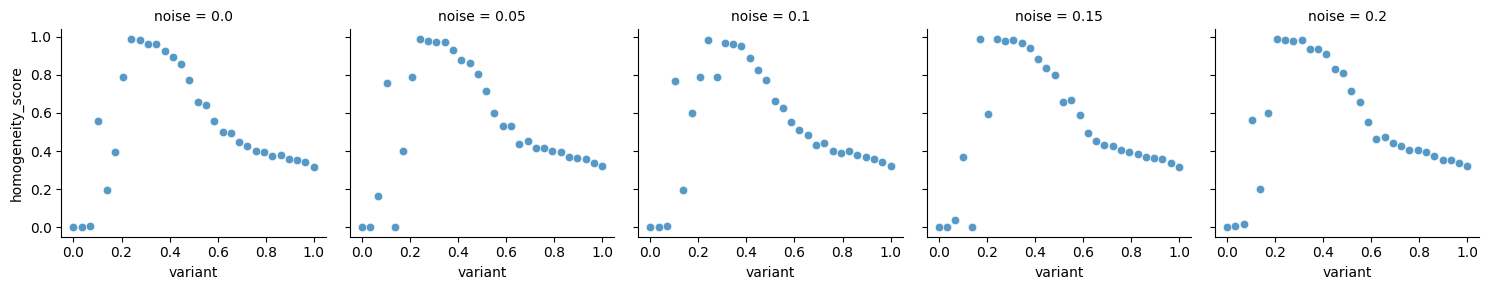

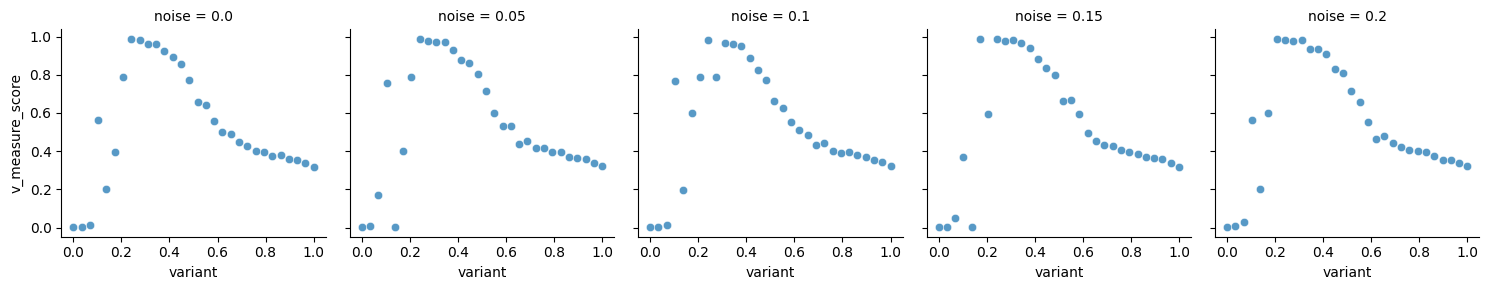

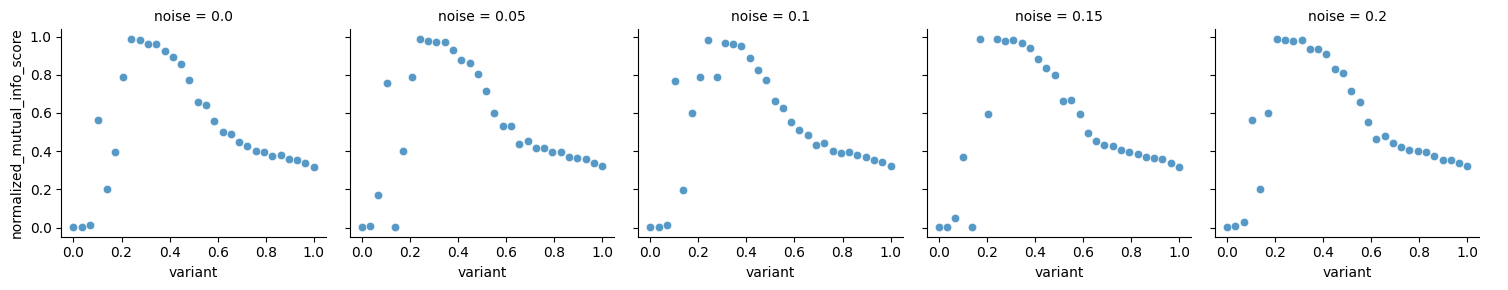

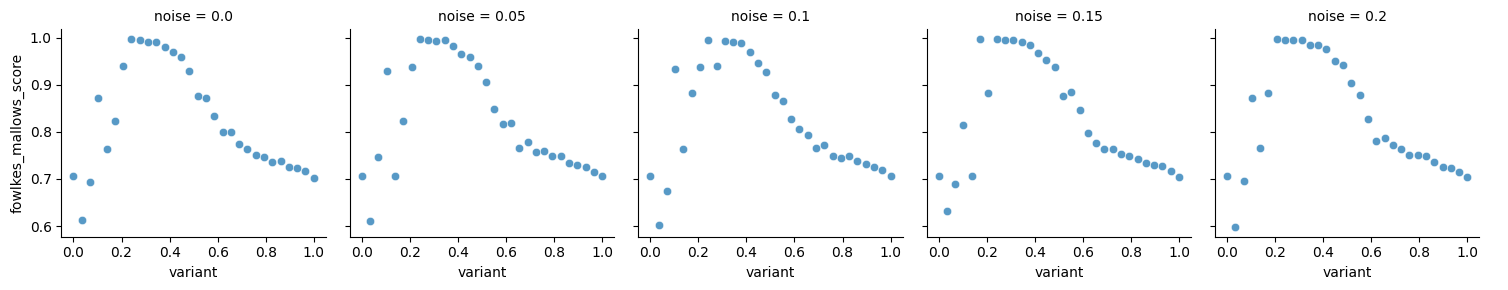

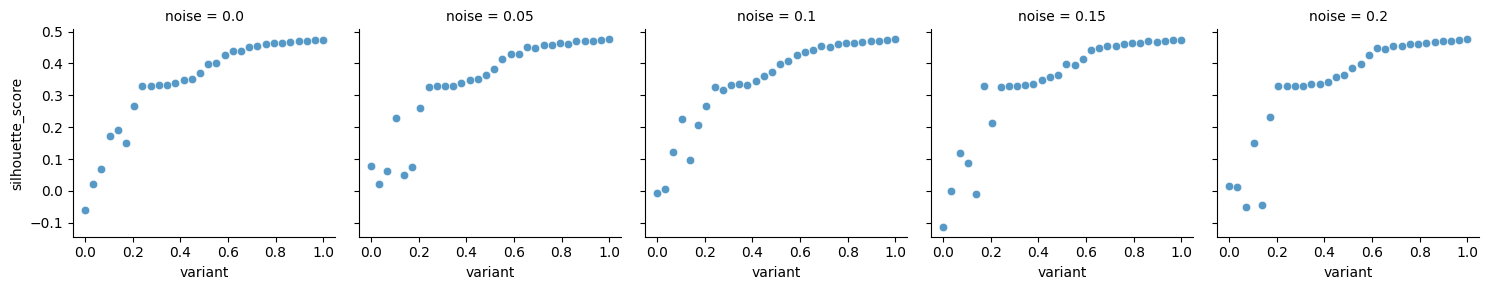

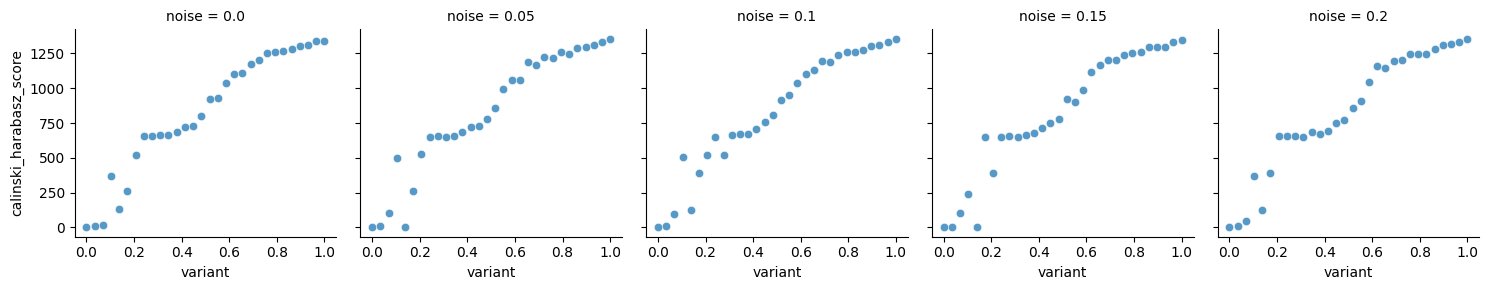

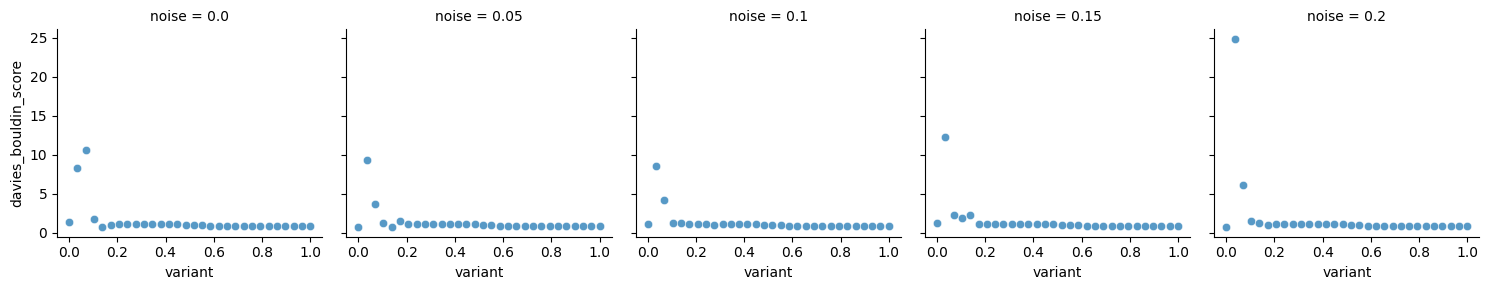

In [18]:
def show_refinement_experiment_results(experiment, metrics = DEFAULT_METRICS):

    # filter given experiment, average out over repeats
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    summarised = experiment_results.groupby(['noise', 'variant', 'n_points']).mean(True).reset_index()

    # for each metric to plot, show a (single row) facetgrid 
    for metric in metrics:
        g = sns.FacetGrid(summarised, col="noise")
        g.map_dataframe(sns.scatterplot, "variant", metric, alpha = 0.75)
        g.add_legend()
        if metric == 'time':
            plt.yscale('log')
        plt.show()

show_refinement_experiment_results('Refinement EPS Impact')

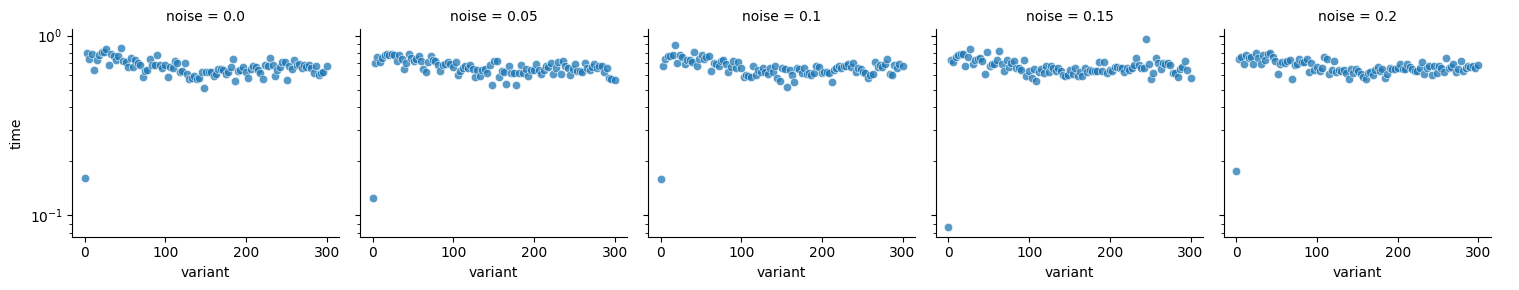

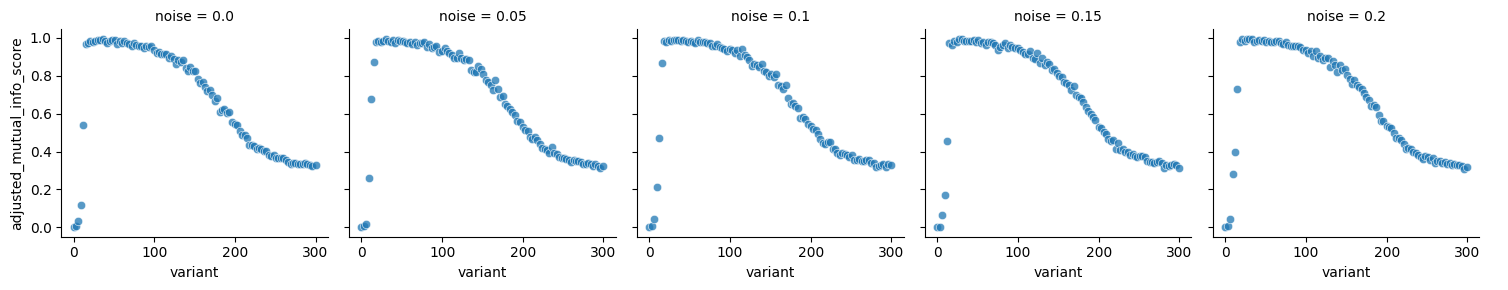

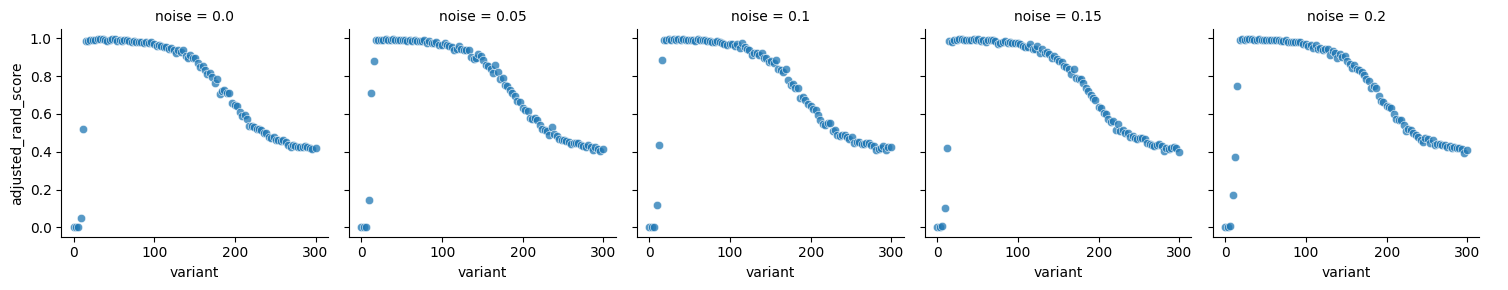

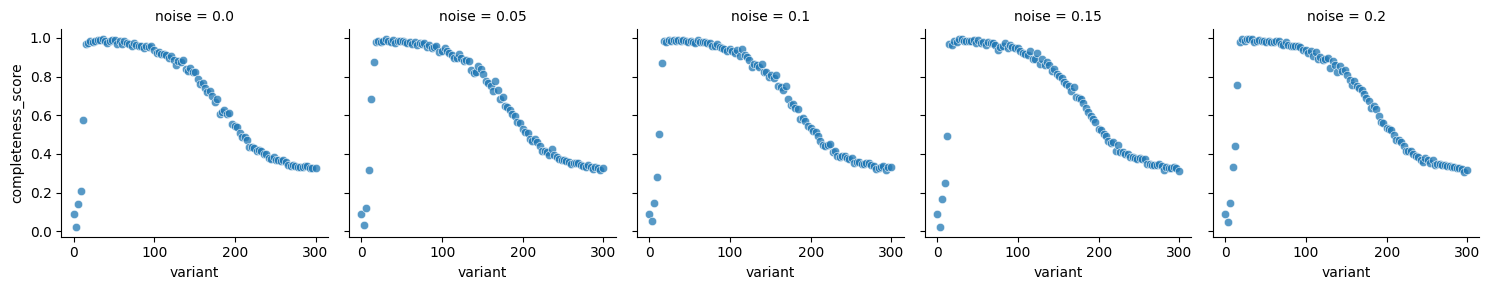

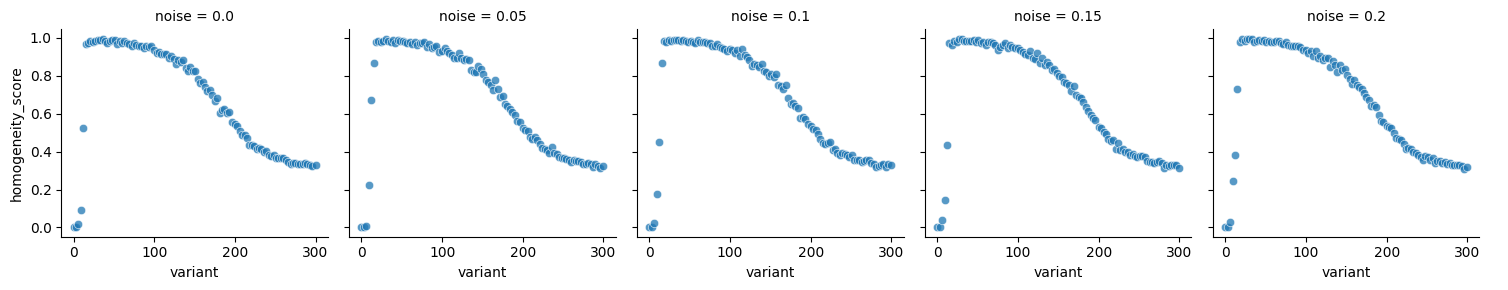

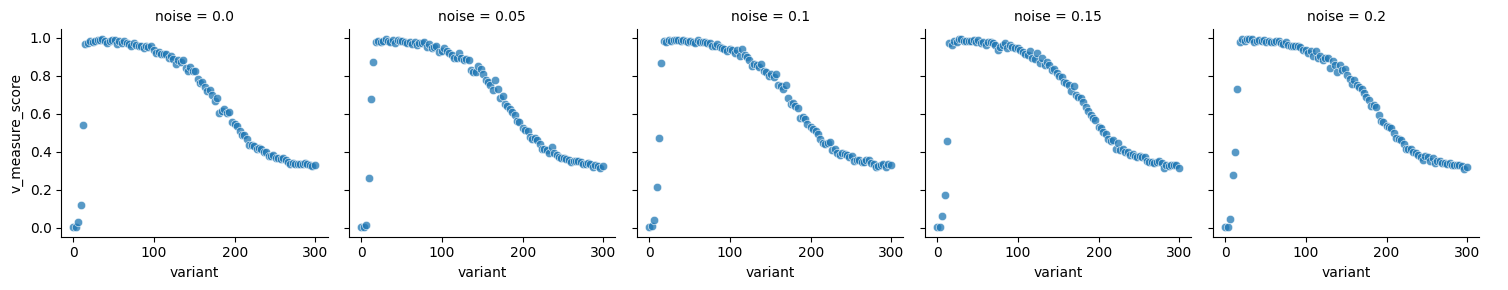

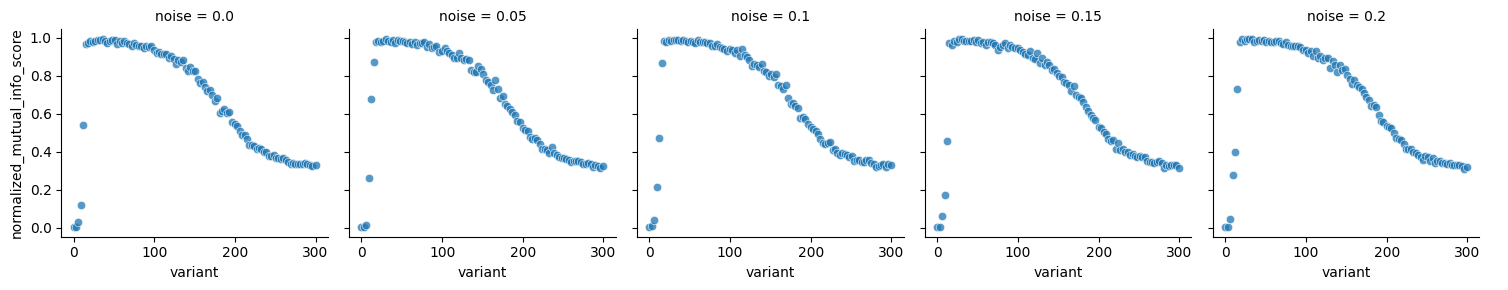

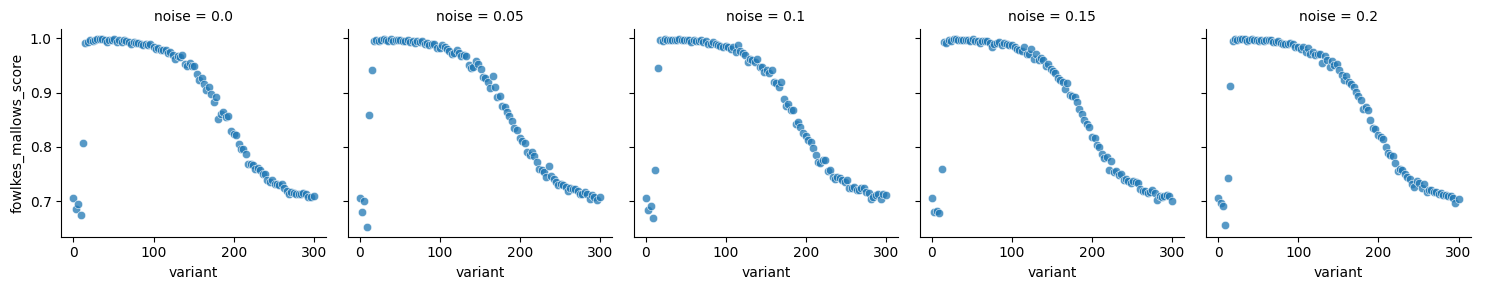

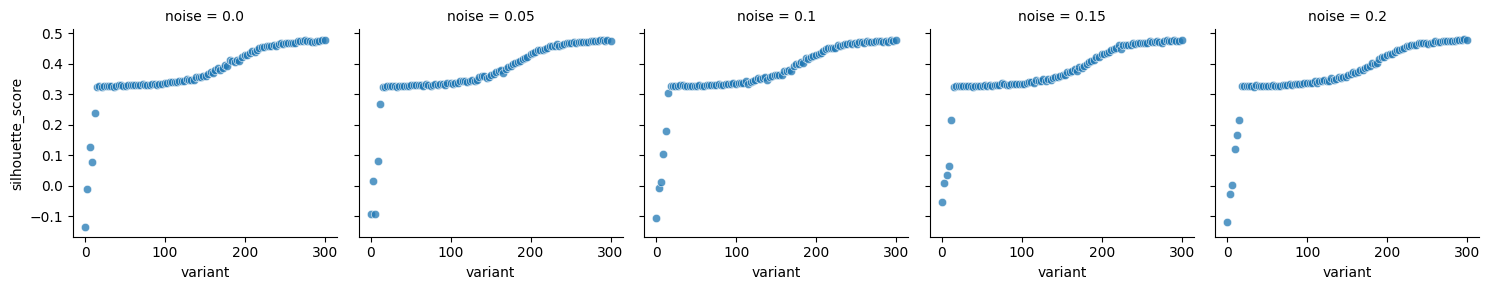

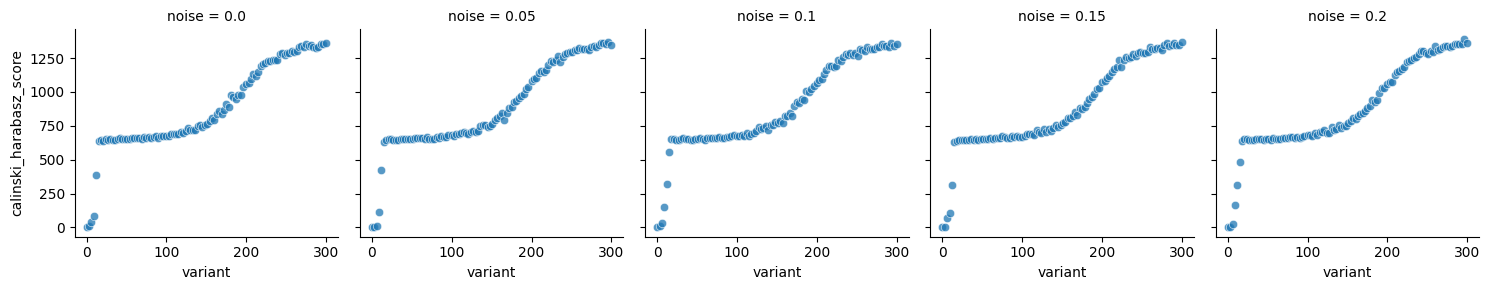

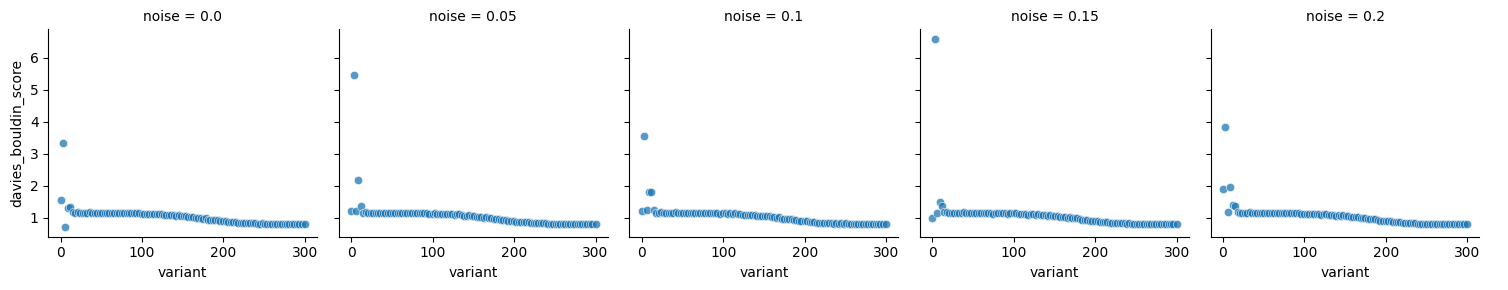

In [19]:
show_refinement_experiment_results('Refinement k Impact KNN')

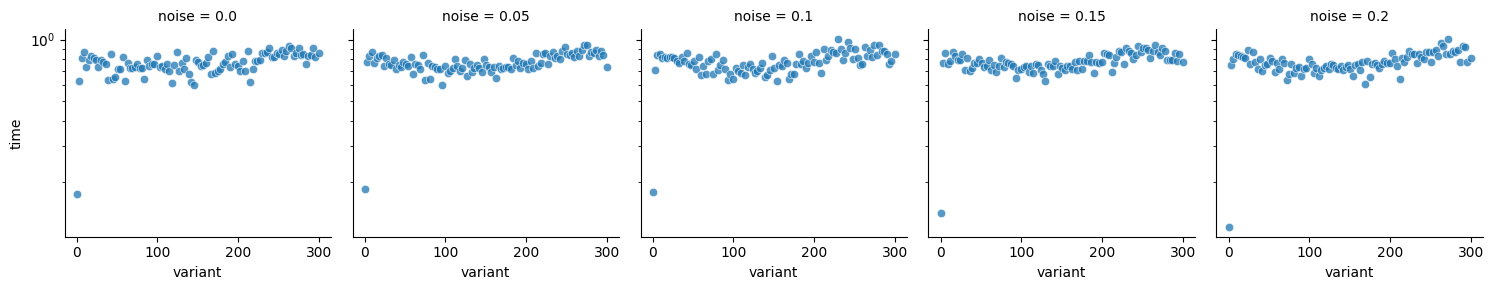

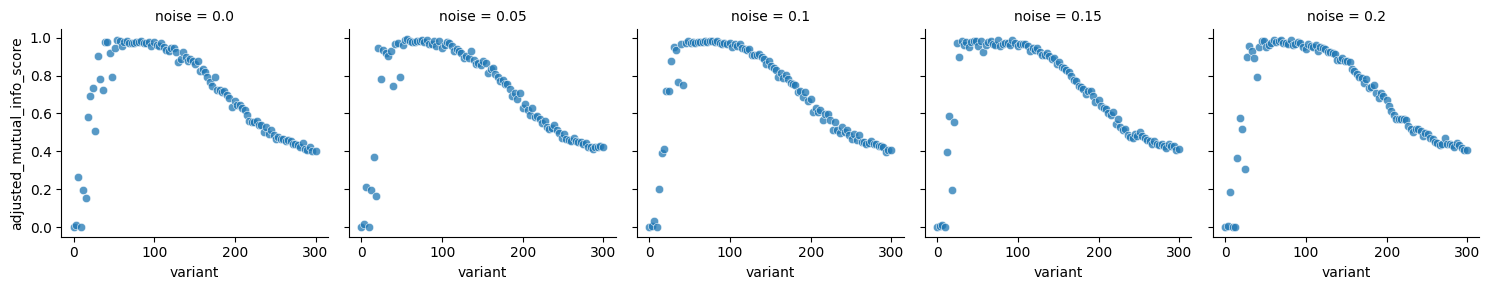

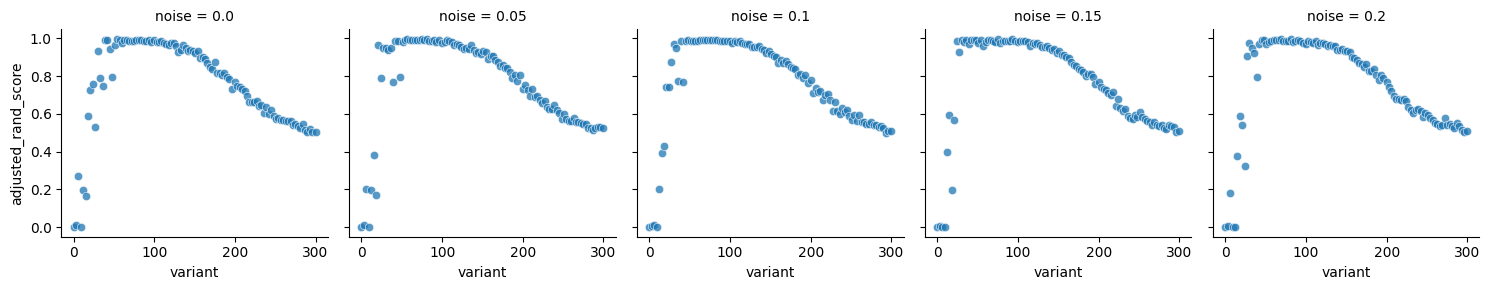

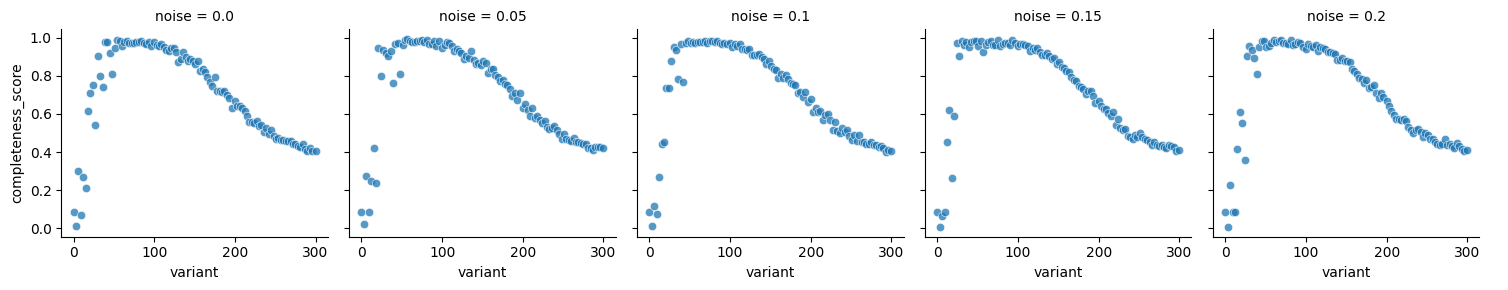

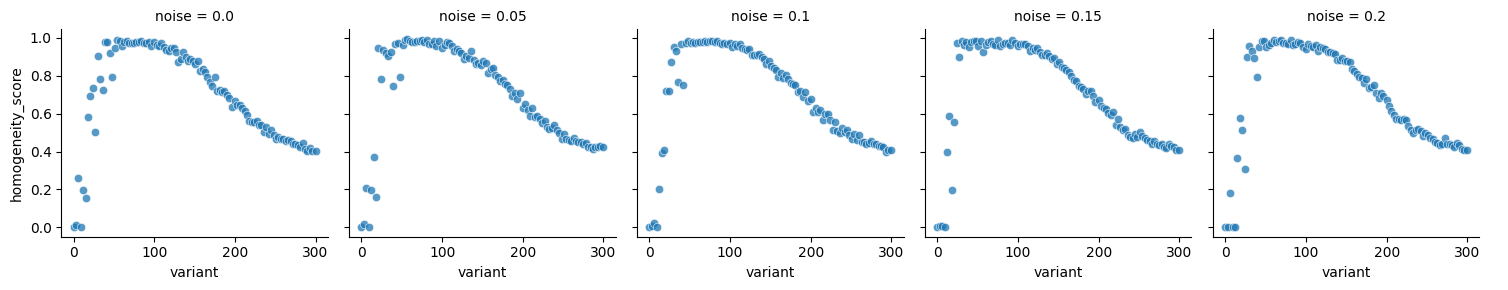

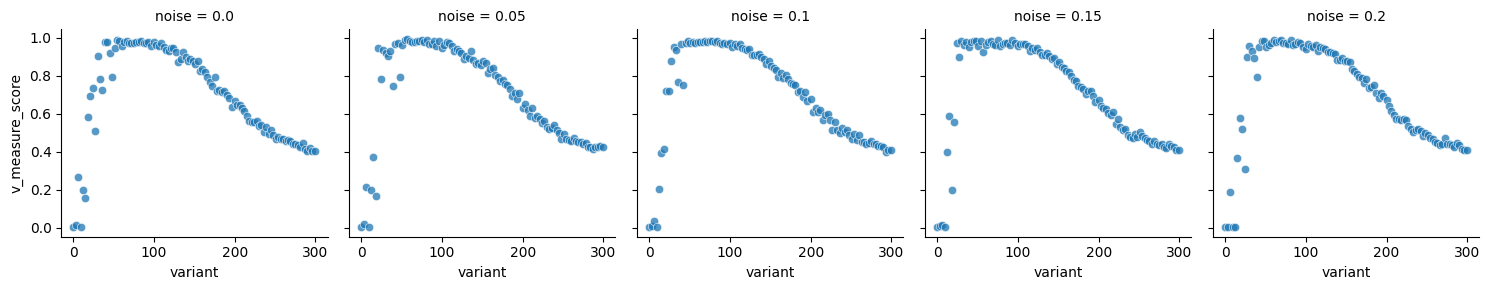

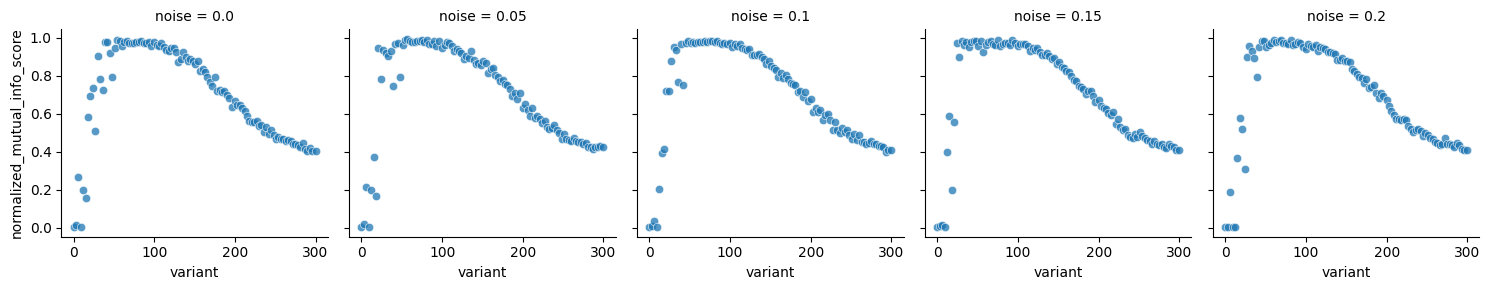

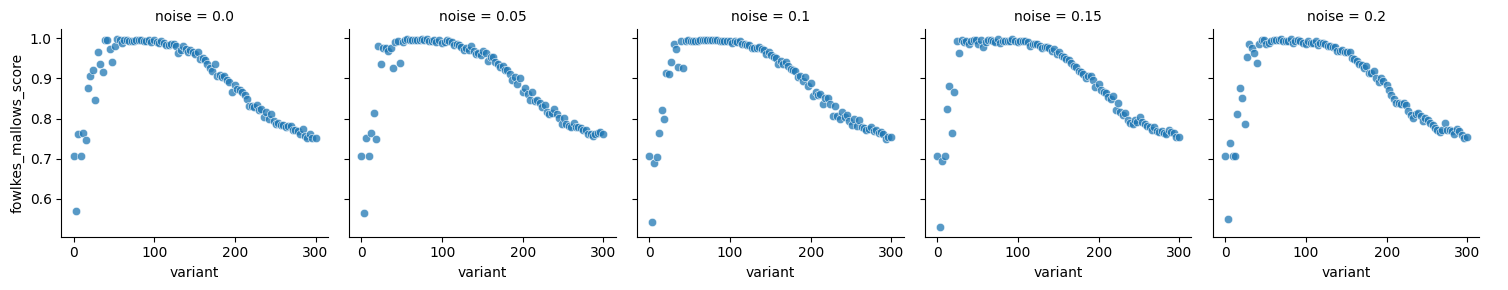

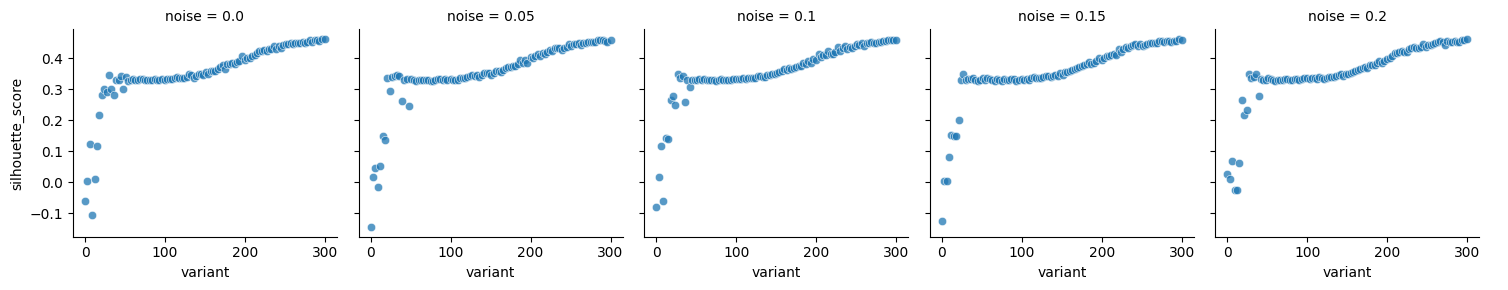

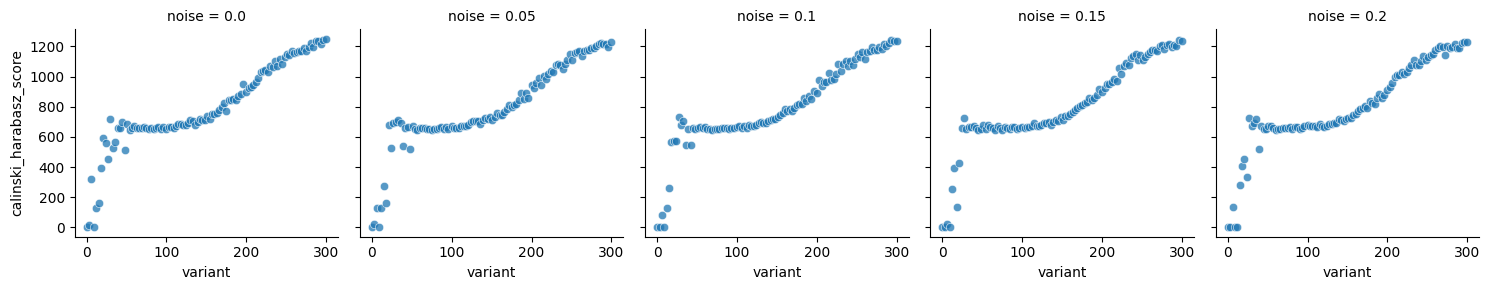

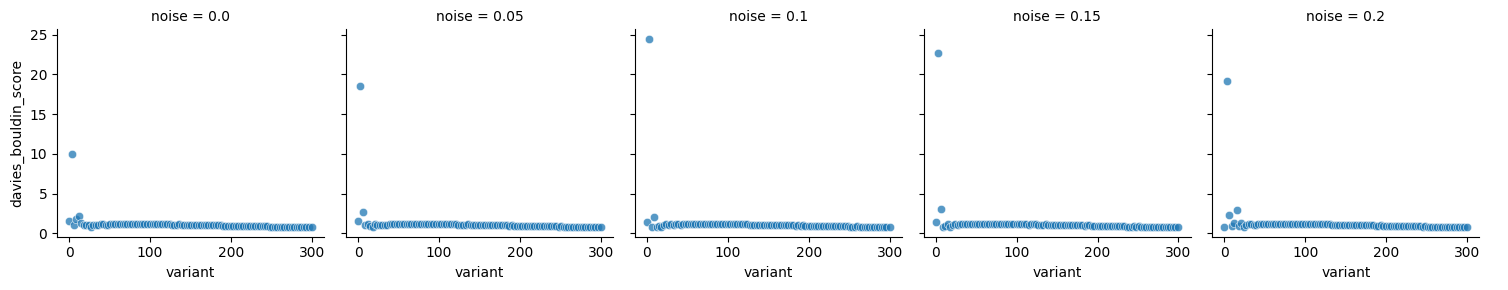

In [20]:
show_refinement_experiment_results('Refinement k Impact MKNN')